# Real Estate Investment Prospects For Charlotte, North Carolina And Surrounding Areas: a Time Series
Project: Module 4 Final
<br>
Instructor: Yish Lim
<br>
Date: 02-2021

## Client Case:
A real estate asset and investment management firm specializing in Single-Family and Build-To-Rent residences is interested in gauging the potential opportunity for BTR assets in or on the outskirts of Charlotte, North Carolina. As of February 2021, Charlotte is one of the most sought out destinations for real estate in the United States. However, there is a significant shortage of supply for homes in Charlotte (and around the country). 

The client has requested an analysis and forecast with regard to the best zip code(s) to invest in, within (<b>or on the outskirts of) </b>Charlotte, North Carolina, with the interest in establishing a portfolio of 10-20 homes.

Although data related to potential rental income is vital to assessing the viability of this strategy, among other aspects, the Client is firstly interested in protecting initial investments by understanding the forecasts for invidiual zip codes over the next 5 years, as the Charlotte real estate market has been steadily rising and could be a bubble on the verge of bursting just as much as it could present a solid opportunity for investors.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
sns.set()

In [3]:
#! pip install pgeocode
import pgeocode

In [4]:
# Importing the dataframe
df = pd.read_csv('zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [5]:
len(df.CountyName.sort_values().unique())

1212

In [6]:
df.loc[df.CountyName == 'Cabarrus']

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
111,69672,28027,Concord,NC,Charlotte,Cabarrus,112,126600.0,127300.0,127700.0,...,204000,205600,207300,209000,210400,212000,213700,215200,216700,218000
606,69670,28025,Concord,NC,Charlotte,Cabarrus,607,96500.0,97200.0,97600.0,...,156800,157500,158200,159000,159900,160800,161800,162400,162900,163300
3909,69702,28081,Kannapolis,NC,Charlotte,Cabarrus,3910,61900.0,62300.0,62600.0,...,117500,119600,121400,123200,124700,125600,125700,125800,126700,127500
4372,69704,28083,Kannapolis,NC,Charlotte,Cabarrus,4373,62100.0,62500.0,62800.0,...,111200,112400,113500,115000,117000,118600,119500,119800,120100,120700
6093,69696,28075,Harrisburg,NC,Charlotte,Cabarrus,6094,165300.0,166000.0,166400.0,...,262600,263200,264000,264600,265600,266800,268000,269100,269700,269700
9277,69720,28107,Midland,NC,Charlotte,Cabarrus,9278,95600.0,95500.0,95400.0,...,183700,182400,181700,182300,183500,184700,186700,188700,189900,190200
9791,69732,28124,Mount Pleasant,NC,Charlotte,Cabarrus,9792,71600.0,71700.0,71700.0,...,142100,142000,141400,141100,140900,140900,141100,143300,147900,152300


In [7]:
nc_homes_meck = df.loc[df.CountyName == 'Mecklenburg']

In [8]:
nc_homes_meck

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
24,69816,28269,Charlotte,NC,Charlotte,Mecklenburg,25,126100.0,126600.0,127100.0,...,184700,186600,188200,189800,191700,193500,195100,196600,198500,199700
55,69823,28277,Charlotte,NC,Charlotte,Mecklenburg,56,183900.0,185100.0,186300.0,...,348100,349500,350500,352500,355400,357900,359900,361900,363800,364800
217,69699,28078,Huntersville,NC,Charlotte,Mecklenburg,218,166200.0,166800.0,167200.0,...,284900,286500,287900,289400,291600,293800,295500,297000,299000,300500
392,69779,28216,Charlotte,NC,Charlotte,Mecklenburg,393,96900.0,97100.0,97200.0,...,144200,145500,146900,148700,150600,152300,153700,155300,157400,159000
409,69768,28205,Charlotte,NC,Charlotte,Mecklenburg,410,73700.0,74200.0,74800.0,...,222800,227100,231600,236500,241800,247100,251500,256300,262000,265900
442,69778,28215,Charlotte,NC,Charlotte,Mecklenburg,443,99100.0,99800.0,100500.0,...,151200,153400,155500,157400,159600,162000,163800,165700,168100,169900
467,69773,28210,Charlotte,NC,Charlotte,Mecklenburg,468,135000.0,135200.0,135400.0,...,345000,348400,351700,353100,354600,356200,357400,359100,362200,363800
472,69789,28227,Mint Hill,NC,Charlotte,Mecklenburg,473,101700.0,102100.0,102600.0,...,172200,173900,175100,176600,178900,181300,183400,185800,189200,192100
918,69813,28262,Charlotte,NC,Charlotte,Mecklenburg,919,125200.0,125700.0,126300.0,...,175600,177600,180000,182000,184000,185900,187200,188800,190900,192300
1288,69788,28226,Charlotte,NC,Charlotte,Mecklenburg,1289,167500.0,168300.0,169000.0,...,364100,366700,369700,372700,375500,378700,382300,386800,390100,390800


In [9]:
# Filtering for the zip codes that correspond to city names that are not Charlotte but are in Mecklenburg County.
outskirts_ch = nc_homes_meck.loc[nc_homes_meck.City != 'Charlotte']

In [10]:
outskirts_ch

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
217,69699,28078,Huntersville,NC,Charlotte,Mecklenburg,218,166200.0,166800.0,167200.0,...,284900,286500,287900,289400,291600,293800,295500,297000,299000,300500
472,69789,28227,Mint Hill,NC,Charlotte,Mecklenburg,473,101700.0,102100.0,102600.0,...,172200,173900,175100,176600,178900,181300,183400,185800,189200,192100
1400,69718,28105,Matthews,NC,Charlotte,Mecklenburg,1401,137800.0,138600.0,139500.0,...,245400,247400,248800,249900,251500,253600,255700,258200,261200,263100
2455,69673,28031,Cornelius,NC,Charlotte,Mecklenburg,2456,172700.0,173700.0,174600.0,...,298100,299800,301200,302600,305000,307600,309500,311000,312400,313400
5720,69678,28036,Davidson,NC,Charlotte,Mecklenburg,5721,179200.0,180700.0,182000.0,...,396300,395800,394400,392700,391400,390600,390700,393400,397900,400700
7526,69740,28134,Pineville,NC,Charlotte,Mecklenburg,7527,109600.0,109800.0,110000.0,...,190300,192200,194200,196100,198200,200500,202800,205100,207200,208700


In [11]:
outskirts_series = outskirts_ch.drop(['RegionID','City','State','Metro','CountyName','SizeRank'], axis=1)

In [12]:
outskirts_series

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
217,28078,166200.0,166800.0,167200.0,167700.0,168100.0,168500.0,168900.0,169500.0,170300.0,...,284900,286500,287900,289400,291600,293800,295500,297000,299000,300500
472,28227,101700.0,102100.0,102600.0,103000.0,103400.0,103800.0,104200.0,104700.0,105200.0,...,172200,173900,175100,176600,178900,181300,183400,185800,189200,192100
1400,28105,137800.0,138600.0,139500.0,140300.0,141100.0,141800.0,142600.0,143400.0,144200.0,...,245400,247400,248800,249900,251500,253600,255700,258200,261200,263100
2455,28031,172700.0,173700.0,174600.0,175300.0,175900.0,176500.0,177000.0,177700.0,178500.0,...,298100,299800,301200,302600,305000,307600,309500,311000,312400,313400
5720,28036,179200.0,180700.0,182000.0,183100.0,184000.0,184900.0,185700.0,186600.0,187900.0,...,396300,395800,394400,392700,391400,390600,390700,393400,397900,400700
7526,28134,109600.0,109800.0,110000.0,110200.0,110400.0,110600.0,110800.0,111000.0,111300.0,...,190300,192200,194200,196100,198200,200500,202800,205100,207200,208700


In [13]:
outskirts_regions = outskirts_series.RegionName

In [14]:
outskirts_years = outskirts_series.drop('RegionName', axis=1)

In [15]:
outskirts_regions

217     28078
472     28227
1400    28105
2455    28031
5720    28036
7526    28134
Name: RegionName, dtype: int64

In [16]:
zips = [i for i in outskirts_regions]

In [17]:
zips

[28078, 28227, 28105, 28031, 28036, 28134]

In [18]:
outskirts_years

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
217,166200.0,166800.0,167200.0,167700.0,168100.0,168500.0,168900.0,169500.0,170300.0,171300.0,...,284900,286500,287900,289400,291600,293800,295500,297000,299000,300500
472,101700.0,102100.0,102600.0,103000.0,103400.0,103800.0,104200.0,104700.0,105200.0,105800.0,...,172200,173900,175100,176600,178900,181300,183400,185800,189200,192100
1400,137800.0,138600.0,139500.0,140300.0,141100.0,141800.0,142600.0,143400.0,144200.0,145000.0,...,245400,247400,248800,249900,251500,253600,255700,258200,261200,263100
2455,172700.0,173700.0,174600.0,175300.0,175900.0,176500.0,177000.0,177700.0,178500.0,179500.0,...,298100,299800,301200,302600,305000,307600,309500,311000,312400,313400
5720,179200.0,180700.0,182000.0,183100.0,184000.0,184900.0,185700.0,186600.0,187900.0,189500.0,...,396300,395800,394400,392700,391400,390600,390700,393400,397900,400700
7526,109600.0,109800.0,110000.0,110200.0,110400.0,110600.0,110800.0,111000.0,111300.0,111700.0,...,190300,192200,194200,196100,198200,200500,202800,205100,207200,208700


In [19]:
# Transposing the series
outskirts_years = outskirts_years.transpose()

In [20]:
outskirts_years

,217,472,1400,2455,5720,7526
1996-04,166200.0,101700.0,137800.0,172700.0,179200.0,109600.0
1996-05,166800.0,102100.0,138600.0,173700.0,180700.0,109800.0
1996-06,167200.0,102600.0,139500.0,174600.0,182000.0,110000.0
1996-07,167700.0,103000.0,140300.0,175300.0,183100.0,110200.0
1996-08,168100.0,103400.0,141100.0,175900.0,184000.0,110400.0
...,...,...,...,...,...,...
2017-12,293800.0,181300.0,253600.0,307600.0,390600.0,200500.0
2018-01,295500.0,183400.0,255700.0,309500.0,390700.0,202800.0
2018-02,297000.0,185800.0,258200.0,311000.0,393400.0,205100.0
2018-03,299000.0,189200.0,261200.0,312400.0,397900.0,207200.0


In [21]:
outskirts_years = outskirts_years.rename(columns={217: zips[0], 472: zips[1],
                                                  1400: zips[2], 2455: zips[3],
                                                 5720: zips[4], 7526: zips[5]})

In [22]:
outskirts_years

,28078,28227,28105,28031,28036,28134
1996-04,166200.0,101700.0,137800.0,172700.0,179200.0,109600.0
1996-05,166800.0,102100.0,138600.0,173700.0,180700.0,109800.0
1996-06,167200.0,102600.0,139500.0,174600.0,182000.0,110000.0
1996-07,167700.0,103000.0,140300.0,175300.0,183100.0,110200.0
1996-08,168100.0,103400.0,141100.0,175900.0,184000.0,110400.0
...,...,...,...,...,...,...
2017-12,293800.0,181300.0,253600.0,307600.0,390600.0,200500.0
2018-01,295500.0,183400.0,255700.0,309500.0,390700.0,202800.0
2018-02,297000.0,185800.0,258200.0,311000.0,393400.0,205100.0
2018-03,299000.0,189200.0,261200.0,312400.0,397900.0,207200.0


In [23]:
ch_edge_series = outskirts_years

In [24]:
# Changing series index to datetime to make this more workable for my needs
ch_edge_series.index = pd.to_datetime(ch_edge_series.index)

In [25]:
ch_edge_series

,28078,28227,28105,28031,28036,28134
1996-04-01,166200.0,101700.0,137800.0,172700.0,179200.0,109600.0
1996-05-01,166800.0,102100.0,138600.0,173700.0,180700.0,109800.0
1996-06-01,167200.0,102600.0,139500.0,174600.0,182000.0,110000.0
1996-07-01,167700.0,103000.0,140300.0,175300.0,183100.0,110200.0
1996-08-01,168100.0,103400.0,141100.0,175900.0,184000.0,110400.0
...,...,...,...,...,...,...
2017-12-01,293800.0,181300.0,253600.0,307600.0,390600.0,200500.0
2018-01-01,295500.0,183400.0,255700.0,309500.0,390700.0,202800.0
2018-02-01,297000.0,185800.0,258200.0,311000.0,393400.0,205100.0
2018-03-01,299000.0,189200.0,261200.0,312400.0,397900.0,207200.0


<AxesSubplot:>

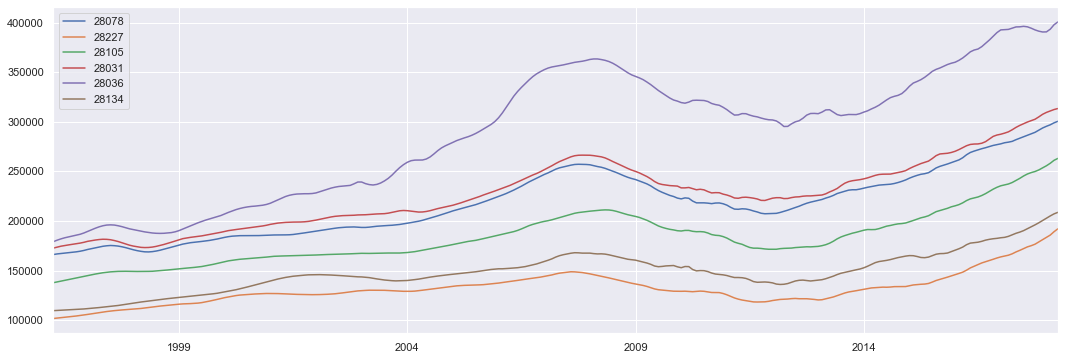

In [26]:
ch_edge_series.plot(figsize=(18,6), legend=True)

In [27]:
ch_edge_series.describe()

,28078,28227,28105,28031,28036,28134
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,217885.283019,131804.905660,183282.641509,226931.698113,288527.924528,148240.000000
std,33712.801757,16240.468489,26811.591522,34585.382583,65138.178111,20306.383904
min,166200.000000,101700.000000,137800.000000,172700.000000,179200.000000,109600.000000
25%,188000.000000,121700.000000,165200.000000,199200.000000,227500.000000,138600.000000
50%,216500.000000,129300.000000,178000.000000,225000.000000,306300.000000,145800.000000
75%,241800.000000,138000.000000,199600.000000,249700.000000,342500.000000,160900.000000
max,300500.000000,192100.000000,263100.000000,313400.000000,400700.000000,208700.000000


In [28]:
# Checking to make sure there are no NaN's
ch_edge_series.isnull().sum()

28078    0
28227    0
28105    0
28031    0
28036    0
28134    0
dtype: int64

In [29]:
ch_edge_series_2006 = ch_edge_series['2006':]

In [30]:
ch_edge_series_2006

,28078,28227,28105,28031,28036,28134
2006-01-01,224800.0,137400.0,185800.0,231600.0,304100.0,151800.0
2006-02-01,226200.0,138000.0,186600.0,233000.0,309000.0,151800.0
2006-03-01,227700.0,138500.0,187500.0,234400.0,314700.0,152000.0
2006-04-01,229400.0,139000.0,188400.0,235900.0,320500.0,152300.0
2006-05-01,231200.0,139600.0,189300.0,237600.0,325900.0,152600.0
...,...,...,...,...,...,...
2017-12-01,293800.0,181300.0,253600.0,307600.0,390600.0,200500.0
2018-01-01,295500.0,183400.0,255700.0,309500.0,390700.0,202800.0
2018-02-01,297000.0,185800.0,258200.0,311000.0,393400.0,205100.0
2018-03-01,299000.0,189200.0,261200.0,312400.0,397900.0,207200.0


<AxesSubplot:>

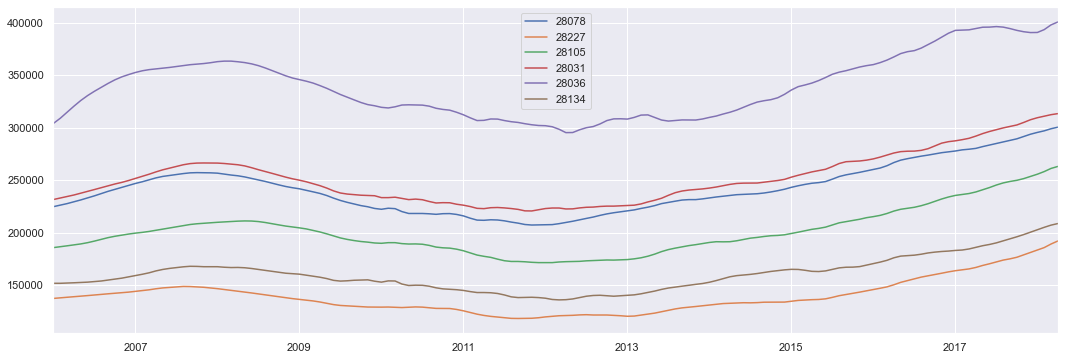

In [31]:
ch_edge_series_2006.plot(figsize=(18,6))

In [32]:
top20_meck = nc_homes_meck.loc[nc_homes_meck.SizeRank < 3508]

In [33]:
top20_meck

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
24,69816,28269,Charlotte,NC,Charlotte,Mecklenburg,25,126100.0,126600.0,127100.0,...,184700,186600,188200,189800,191700,193500,195100,196600,198500,199700
55,69823,28277,Charlotte,NC,Charlotte,Mecklenburg,56,183900.0,185100.0,186300.0,...,348100,349500,350500,352500,355400,357900,359900,361900,363800,364800
217,69699,28078,Huntersville,NC,Charlotte,Mecklenburg,218,166200.0,166800.0,167200.0,...,284900,286500,287900,289400,291600,293800,295500,297000,299000,300500
392,69779,28216,Charlotte,NC,Charlotte,Mecklenburg,393,96900.0,97100.0,97200.0,...,144200,145500,146900,148700,150600,152300,153700,155300,157400,159000
409,69768,28205,Charlotte,NC,Charlotte,Mecklenburg,410,73700.0,74200.0,74800.0,...,222800,227100,231600,236500,241800,247100,251500,256300,262000,265900
442,69778,28215,Charlotte,NC,Charlotte,Mecklenburg,443,99100.0,99800.0,100500.0,...,151200,153400,155500,157400,159600,162000,163800,165700,168100,169900
467,69773,28210,Charlotte,NC,Charlotte,Mecklenburg,468,135000.0,135200.0,135400.0,...,345000,348400,351700,353100,354600,356200,357400,359100,362200,363800
472,69789,28227,Mint Hill,NC,Charlotte,Mecklenburg,473,101700.0,102100.0,102600.0,...,172200,173900,175100,176600,178900,181300,183400,185800,189200,192100
918,69813,28262,Charlotte,NC,Charlotte,Mecklenburg,919,125200.0,125700.0,126300.0,...,175600,177600,180000,182000,184000,185900,187200,188800,190900,192300
1288,69788,28226,Charlotte,NC,Charlotte,Mecklenburg,1289,167500.0,168300.0,169000.0,...,364100,366700,369700,372700,375500,378700,382300,386800,390100,390800


In [34]:
top20_meck['hROI'] = (top20_meck['2018-04']/top20_meck['1996-04'])-1

C:\Users\samsung\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
top20_meck.hROI.sort_values()

918     0.535942
24      0.583664
1352    0.604972
2067    0.631631
392     0.640867
3506    0.687105
442     0.714430
1814    0.730435
217     0.808063
2455    0.814708
472     0.888889
1502    0.898534
1400    0.909289
1821    0.922034
55      0.983687
2666    1.042003
1288    1.333134
467     1.694815
2635    1.733520
409     2.607870
Name: hROI, dtype: float64

In [36]:
top20_meck

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,hROI
24,69816,28269,Charlotte,NC,Charlotte,Mecklenburg,25,126100.0,126600.0,127100.0,...,186600,188200,189800,191700,193500,195100,196600,198500,199700,0.583664
55,69823,28277,Charlotte,NC,Charlotte,Mecklenburg,56,183900.0,185100.0,186300.0,...,349500,350500,352500,355400,357900,359900,361900,363800,364800,0.983687
217,69699,28078,Huntersville,NC,Charlotte,Mecklenburg,218,166200.0,166800.0,167200.0,...,286500,287900,289400,291600,293800,295500,297000,299000,300500,0.808063
392,69779,28216,Charlotte,NC,Charlotte,Mecklenburg,393,96900.0,97100.0,97200.0,...,145500,146900,148700,150600,152300,153700,155300,157400,159000,0.640867
409,69768,28205,Charlotte,NC,Charlotte,Mecklenburg,410,73700.0,74200.0,74800.0,...,227100,231600,236500,241800,247100,251500,256300,262000,265900,2.607870
442,69778,28215,Charlotte,NC,Charlotte,Mecklenburg,443,99100.0,99800.0,100500.0,...,153400,155500,157400,159600,162000,163800,165700,168100,169900,0.714430
467,69773,28210,Charlotte,NC,Charlotte,Mecklenburg,468,135000.0,135200.0,135400.0,...,348400,351700,353100,354600,356200,357400,359100,362200,363800,1.694815
472,69789,28227,Mint Hill,NC,Charlotte,Mecklenburg,473,101700.0,102100.0,102600.0,...,173900,175100,176600,178900,181300,183400,185800,189200,192100,0.888889
918,69813,28262,Charlotte,NC,Charlotte,Mecklenburg,919,125200.0,125700.0,126300.0,...,177600,180000,182000,184000,185900,187200,188800,190900,192300,0.535942
1288,69788,28226,Charlotte,NC,Charlotte,Mecklenburg,1289,167500.0,168300.0,169000.0,...,366700,369700,372700,375500,378700,382300,386800,390100,390800,1.333134


In [37]:
top20_meck2 = top20_meck.drop(['RegionID','City','State','Metro','CountyName','SizeRank'], axis=1)

In [38]:
top20_meck2

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,hROI
24,28269,126100.0,126600.0,127100.0,127600.0,128000.0,128300.0,128700.0,129000.0,129500.0,...,186600,188200,189800,191700,193500,195100,196600,198500,199700,0.583664
55,28277,183900.0,185100.0,186300.0,187300.0,188300.0,189200.0,190100.0,191000.0,192000.0,...,349500,350500,352500,355400,357900,359900,361900,363800,364800,0.983687
217,28078,166200.0,166800.0,167200.0,167700.0,168100.0,168500.0,168900.0,169500.0,170300.0,...,286500,287900,289400,291600,293800,295500,297000,299000,300500,0.808063
392,28216,96900.0,97100.0,97200.0,97400.0,97600.0,97900.0,98300.0,98600.0,99100.0,...,145500,146900,148700,150600,152300,153700,155300,157400,159000,0.640867
409,28205,73700.0,74200.0,74800.0,75400.0,76000.0,76500.0,77000.0,77500.0,78000.0,...,227100,231600,236500,241800,247100,251500,256300,262000,265900,2.607870
442,28215,99100.0,99800.0,100500.0,101200.0,101900.0,102500.0,103100.0,103600.0,104100.0,...,153400,155500,157400,159600,162000,163800,165700,168100,169900,0.714430
467,28210,135000.0,135200.0,135400.0,135600.0,135700.0,135800.0,136000.0,136400.0,137000.0,...,348400,351700,353100,354600,356200,357400,359100,362200,363800,1.694815
472,28227,101700.0,102100.0,102600.0,103000.0,103400.0,103800.0,104200.0,104700.0,105200.0,...,173900,175100,176600,178900,181300,183400,185800,189200,192100,0.888889
918,28262,125200.0,125700.0,126300.0,126800.0,127300.0,127800.0,128200.0,128500.0,128900.0,...,177600,180000,182000,184000,185900,187200,188800,190900,192300,0.535942
1288,28226,167500.0,168300.0,169000.0,169700.0,170500.0,171100.0,171700.0,172300.0,172900.0,...,366700,369700,372700,375500,378700,382300,386800,390100,390800,1.333134


Update:
--
It seems that I missed some important entries for neighboring Charlotte area, namely both Gaston county and Cabarrus county. Due to the needs of the analysis, I'll include them in the Series.

---

In [39]:
# Beginning from "scratch" with the original dataset
# df

In [40]:
dfnc = df.loc[df.State == 'NC']

In [41]:
# Pulling the three counties of focus from the dataset 
gas = dfnc.loc[dfnc.CountyName == 'Gaston']
meck = dfnc.loc[dfnc.CountyName == 'Mecklenburg']
cab = dfnc.loc[dfnc.CountyName == 'Cabarrus']

In [42]:
# Combining these three into one dataset
gas_meck_cab = pd.concat([gas,meck,cab], join='outer')
gas_meck_cab

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
1573,69688,28054,Gastonia,NC,Charlotte,Gaston,1574,70300.0,70600.0,71000.0,...,129200,130500,132100,133100,133500,134400,135900,137600,139400,140900
2368,69686,28052,Gastonia,NC,Charlotte,Gaston,2369,48300.0,48700.0,49100.0,...,78600,80000,81600,82300,82400,83100,85000,86100,86100,85600
2630,69690,28056,Gastonia,NC,Charlotte,Gaston,2631,84900.0,85200.0,85600.0,...,166000,167000,168000,169000,170100,171100,171900,172300,173400,174700
4275,69661,28012,Belmont,NC,Charlotte,Gaston,4276,82200.0,82600.0,83100.0,...,174000,176300,178800,180500,180800,180500,180300,181400,184100,186600
4805,69730,28120,Mount Holly,NC,Charlotte,Gaston,4806,83700.0,84000.0,84400.0,...,161300,162600,164100,165700,167000,168200,169000,170000,172100,174000
5943,69676,28034,Dallas,NC,Charlotte,Gaston,5944,63300.0,63500.0,63700.0,...,118500,119400,120900,122400,123900,125100,126100,126900,127700,128400
6843,69756,28164,Stanley,NC,Charlotte,Gaston,6844,73700.0,73200.0,72700.0,...,171000,171700,173700,175700,176800,177800,178300,178800,180900,183100
7127,69662,28016,Bessemer City,NC,Charlotte,Gaston,7128,55800.0,56000.0,56200.0,...,100800,101800,103200,104000,104200,104500,104900,104900,104600,104300
11312,69713,28098,Lowell,NC,Charlotte,Gaston,11313,63500.0,63800.0,64100.0,...,123200,124500,126400,127900,128700,129400,130200,131100,132200,132800
11953,69674,28032,Cramerton,NC,Charlotte,Gaston,11954,61200.0,61800.0,62400.0,...,122600,124000,125900,127200,127700,127900,128000,128400,129700,131100


Calculating Historical ROI
--
Because there are 45 zip codes, and the goal is to focus on at maximum 10, I'll calculate the historical ROI for each zip code. This is one of the key metrics used to determine feasibility for real estate investment.

In [43]:
# Calculating Historical ROI
gas_meck_cab['hROI'] = (gas_meck_cab['2018-04']/gas_meck_cab['1996-04'])-1

In [44]:
# Checking on the top zip codes according to Historical ROI
gas_meck_cab.sort_values(by=['hROI'], ascending=False)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,hROI
7905,69767,28204,Charlotte,NC,Charlotte,Mecklenburg,7906,153100.0,153200.0,153400.0,...,531300,536000,543000,550600,560300,570500,576400,580200,583400,2.810581
4259,69766,28203,Charlotte,NC,Charlotte,Mecklenburg,4260,162500.0,162900.0,163300.0,...,557700,564000,569800,577200,584300,588900,595500,605400,612100,2.766769
409,69768,28205,Charlotte,NC,Charlotte,Mecklenburg,410,73700.0,74200.0,74800.0,...,227100,231600,236500,241800,247100,251500,256300,262000,265900,2.607870
3538,69772,28209,Charlotte,NC,Charlotte,Mecklenburg,3539,122600.0,123200.0,123700.0,...,395100,397200,399000,401800,404400,405600,407300,411600,415200,2.386623
4871,69765,28202,Charlotte,NC,Charlotte,Mecklenburg,4872,120600.0,121800.0,122900.0,...,357000,359400,361800,363100,364200,366100,368000,370300,372000,2.084577
8528,69770,28207,Charlotte,NC,Charlotte,Mecklenburg,8529,406100.0,408700.0,411200.0,...,1177300,1186700,1195300,1205900,1216100,1225200,1230900,1235400,1238000,2.048510
2635,69774,28211,Charlotte,NC,Charlotte,Mecklenburg,2636,179000.0,179600.0,180200.0,...,456400,457100,459200,462500,466800,469900,474800,482600,489300,1.733520
467,69773,28210,Charlotte,NC,Charlotte,Mecklenburg,468,135000.0,135200.0,135400.0,...,348400,351700,353100,354600,356200,357400,359100,362200,363800,1.694815
6843,69756,28164,Stanley,NC,Charlotte,Gaston,6844,73700.0,73200.0,72700.0,...,171700,173700,175700,176800,177800,178300,178800,180900,183100,1.484396
1288,69788,28226,Charlotte,NC,Charlotte,Mecklenburg,1289,167500.0,168300.0,169000.0,...,366700,369700,372700,375500,378700,382300,386800,390100,390800,1.333134


In [45]:
# Creating a new DF for the zip codes which have an hROI above 1.00
top_21 = gas_meck_cab.loc[gas_meck_cab.hROI >= 1.00]

In [46]:
top_21

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,hROI
1573,69688,28054,Gastonia,NC,Charlotte,Gaston,1574,70300.0,70600.0,71000.0,...,130500,132100,133100,133500,134400,135900,137600,139400,140900,1.004267
2630,69690,28056,Gastonia,NC,Charlotte,Gaston,2631,84900.0,85200.0,85600.0,...,167000,168000,169000,170100,171100,171900,172300,173400,174700,1.057715
4275,69661,28012,Belmont,NC,Charlotte,Gaston,4276,82200.0,82600.0,83100.0,...,176300,178800,180500,180800,180500,180300,181400,184100,186600,1.270073
4805,69730,28120,Mount Holly,NC,Charlotte,Gaston,4806,83700.0,84000.0,84400.0,...,162600,164100,165700,167000,168200,169000,170000,172100,174000,1.078853
5943,69676,28034,Dallas,NC,Charlotte,Gaston,5944,63300.0,63500.0,63700.0,...,119400,120900,122400,123900,125100,126100,126900,127700,128400,1.028436
6843,69756,28164,Stanley,NC,Charlotte,Gaston,6844,73700.0,73200.0,72700.0,...,171700,173700,175700,176800,177800,178300,178800,180900,183100,1.484396
11312,69713,28098,Lowell,NC,Charlotte,Gaston,11313,63500.0,63800.0,64100.0,...,124500,126400,127900,128700,129400,130200,131100,132200,132800,1.091339
11953,69674,28032,Cramerton,NC,Charlotte,Gaston,11954,61200.0,61800.0,62400.0,...,124000,125900,127200,127700,127900,128000,128400,129700,131100,1.142157
409,69768,28205,Charlotte,NC,Charlotte,Mecklenburg,410,73700.0,74200.0,74800.0,...,227100,231600,236500,241800,247100,251500,256300,262000,265900,2.607870
467,69773,28210,Charlotte,NC,Charlotte,Mecklenburg,468,135000.0,135200.0,135400.0,...,348400,351700,353100,354600,356200,357400,359100,362200,363800,1.694815


In [47]:
# Creating initial map needed to plot zip codes with highest Historical ROI
mapper = folium.Map(location=[35.227085, -80.843124], zoom_start=9)
mapper

In [48]:
top_21['RegionName'] = top_21['RegionName'].astype(str)

C:\Users\samsung\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
finder = pgeocode.Nominatim('us')

finder_results = finder.query_postal_code([i for i in top_21['RegionName']])
finder_results.to_csv(r'C:\Users\samsung\data-science-journey\Course Materials\bddl\time_series_home_prices\latlongs.csv', index = False)

In [50]:
mapper.choropleth(geo_data="latlongs.geojson",
             data=top_21,
             columns=['RegionName', 'hROI'],
             key_on='feature.properties.postalCode',
             fill_color='BuGn', fill_opacity=0.7, line_opacity=0.2)

C:\Users\samsung\anaconda3\envs\learn-env\lib\site-packages\folium\folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [51]:
from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(mapper)

In [52]:
mapper

In [53]:
top_21_hROI = top_21[['RegionName','hROI']]
top_21_hROI = top_21_hROI.sort_values(by=['hROI'], ascending=True)
top_21_hROI = top_21_hROI.rename(columns={'RegionName':'ZipCode'})
top_21_hROI

,ZipCode,hROI
1573,28054,1.004267
5943,28034,1.028436
2666,28270,1.042003
2630,28056,1.057715
3909,28081,1.059774
4805,28120,1.078853
11312,28098,1.091339
9791,28124,1.127095
11953,28032,1.142157
5720,28036,1.236049


Text(0.5, 1.0, 'Historical ROI For Top 20 Zip Codes Based On Home Price Mean (Charlotte, NC & Surrounding)')

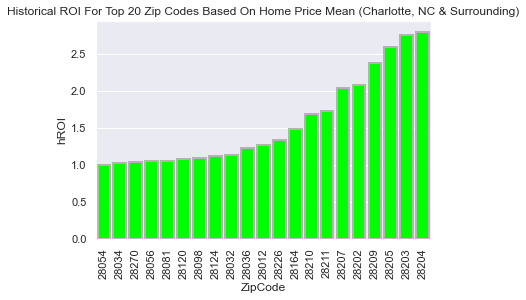

In [54]:
# Plotting the historical ROI of the top 21 zipcodes 
ax = sns.barplot(x="ZipCode", y="hROI", data=top_21_hROI,
                 linewidth=2.0, facecolor=(0, 1, 0, 1),
                 errcolor=".2", edgecolor=".7", dodge=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Historical ROI For Top 20 Zip Codes Based On Home Price Mean (Charlotte, NC & Surrounding)')

In [55]:
# Time to preprocess the dataframe into a workable series
top_21 = top_21.drop(['RegionID','City','State','Metro','CountyName','SizeRank','hROI'], axis=1)

In [56]:
top_21_zip_codes = top_21.RegionName

In [57]:
top_21_zip_codes_list = [i for i in top_21_zip_codes]

In [58]:
top_21 = top_21.drop('RegionName', axis=1)

In [59]:
top_21 = top_21.transpose()

In [60]:
top_21.columns

Int64Index([ 1573,  2630,  4275,  4805,  5943,  6843, 11312, 11953,   409,
              467,  1288,  2635,  2666,  3538,  4259,  4871,  5720,  7905,
             8528,  3909,  9791],
           dtype='int64')

In [61]:
len(top_21_zip_codes_list)

21

In [62]:
top_21 = top_21.rename(columns={1573: top_21_zip_codes_list[0], 2630: top_21_zip_codes_list[1], 4275: top_21_zip_codes_list[2], 4805: top_21_zip_codes_list[3],
                                5943: top_21_zip_codes_list[4], 6843: top_21_zip_codes_list[5], 11312: top_21_zip_codes_list[6], 11953: top_21_zip_codes_list[7], 409: top_21_zip_codes_list[8],
                               467: top_21_zip_codes_list[9], 1288: top_21_zip_codes_list[10], 2635: top_21_zip_codes_list[11], 2666: top_21_zip_codes_list[12], 3538: top_21_zip_codes_list[13],
                               4259: top_21_zip_codes_list[14], 4871: top_21_zip_codes_list[15], 5720: top_21_zip_codes_list[16], 7905: top_21_zip_codes_list[17], 8528: top_21_zip_codes_list[18],
                               3909: top_21_zip_codes_list[19], 9791: top_21_zip_codes_list[20]})

In [63]:
top_21

,28054,28056,28012,28120,28034,28164,28098,28032,28205,28210,...,28211,28270,28209,28203,28202,28036,28204,28207,28081,28124
1996-04,70300.0,84900.0,82200.0,83700.0,63300.0,73700.0,63500.0,61200.0,73700.0,135000.0,...,179000.0,185700.0,122600.0,162500.0,120600.0,179200.0,153100.0,406100.0,61900.0,71600.0
1996-05,70600.0,85200.0,82600.0,84000.0,63500.0,73200.0,63800.0,61800.0,74200.0,135200.0,...,179600.0,186300.0,123200.0,162900.0,121800.0,180700.0,153200.0,408700.0,62300.0,71700.0
1996-06,71000.0,85600.0,83100.0,84400.0,63700.0,72700.0,64100.0,62400.0,74800.0,135400.0,...,180200.0,186800.0,123700.0,163300.0,122900.0,182000.0,153400.0,411200.0,62600.0,71700.0
1996-07,71400.0,86000.0,83700.0,84900.0,63900.0,72400.0,64500.0,63000.0,75400.0,135600.0,...,181000.0,187300.0,124300.0,163700.0,124100.0,183100.0,153500.0,413700.0,62900.0,71600.0
1996-08,71800.0,86500.0,84200.0,85500.0,64200.0,72200.0,65000.0,63600.0,76000.0,135700.0,...,181900.0,187600.0,125000.0,164000.0,125100.0,184000.0,153700.0,415900.0,63100.0,71600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12,134400.0,171100.0,180500.0,168200.0,125100.0,177800.0,129400.0,127900.0,247100.0,356200.0,...,466800.0,370000.0,404400.0,584300.0,364200.0,390600.0,560300.0,1216100.0,125600.0,140900.0
2018-01,135900.0,171900.0,180300.0,169000.0,126100.0,178300.0,130200.0,128000.0,251500.0,357400.0,...,469900.0,372300.0,405600.0,588900.0,366100.0,390700.0,570500.0,1225200.0,125700.0,141100.0
2018-02,137600.0,172300.0,181400.0,170000.0,126900.0,178800.0,131100.0,128400.0,256300.0,359100.0,...,474800.0,374800.0,407300.0,595500.0,368000.0,393400.0,576400.0,1230900.0,125800.0,143300.0
2018-03,139400.0,173400.0,184100.0,172100.0,127700.0,180900.0,132200.0,129700.0,262000.0,362200.0,...,482600.0,377700.0,411600.0,605400.0,370300.0,397900.0,580200.0,1235400.0,126700.0,147900.0


In [64]:
top_21_series = top_21

In [65]:
top_21_series.index = pd.to_datetime(top_21_series.index)

In [66]:
top_21_series

,28054,28056,28012,28120,28034,28164,28098,28032,28205,28210,...,28211,28270,28209,28203,28202,28036,28204,28207,28081,28124
1996-04-01,70300.0,84900.0,82200.0,83700.0,63300.0,73700.0,63500.0,61200.0,73700.0,135000.0,...,179000.0,185700.0,122600.0,162500.0,120600.0,179200.0,153100.0,406100.0,61900.0,71600.0
1996-05-01,70600.0,85200.0,82600.0,84000.0,63500.0,73200.0,63800.0,61800.0,74200.0,135200.0,...,179600.0,186300.0,123200.0,162900.0,121800.0,180700.0,153200.0,408700.0,62300.0,71700.0
1996-06-01,71000.0,85600.0,83100.0,84400.0,63700.0,72700.0,64100.0,62400.0,74800.0,135400.0,...,180200.0,186800.0,123700.0,163300.0,122900.0,182000.0,153400.0,411200.0,62600.0,71700.0
1996-07-01,71400.0,86000.0,83700.0,84900.0,63900.0,72400.0,64500.0,63000.0,75400.0,135600.0,...,181000.0,187300.0,124300.0,163700.0,124100.0,183100.0,153500.0,413700.0,62900.0,71600.0
1996-08-01,71800.0,86500.0,84200.0,85500.0,64200.0,72200.0,65000.0,63600.0,76000.0,135700.0,...,181900.0,187600.0,125000.0,164000.0,125100.0,184000.0,153700.0,415900.0,63100.0,71600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,134400.0,171100.0,180500.0,168200.0,125100.0,177800.0,129400.0,127900.0,247100.0,356200.0,...,466800.0,370000.0,404400.0,584300.0,364200.0,390600.0,560300.0,1216100.0,125600.0,140900.0
2018-01-01,135900.0,171900.0,180300.0,169000.0,126100.0,178300.0,130200.0,128000.0,251500.0,357400.0,...,469900.0,372300.0,405600.0,588900.0,366100.0,390700.0,570500.0,1225200.0,125700.0,141100.0
2018-02-01,137600.0,172300.0,181400.0,170000.0,126900.0,178800.0,131100.0,128400.0,256300.0,359100.0,...,474800.0,374800.0,407300.0,595500.0,368000.0,393400.0,576400.0,1230900.0,125800.0,143300.0
2018-03-01,139400.0,173400.0,184100.0,172100.0,127700.0,180900.0,132200.0,129700.0,262000.0,362200.0,...,482600.0,377700.0,411600.0,605400.0,370300.0,397900.0,580200.0,1235400.0,126700.0,147900.0


Text(0.5, 1.0, 'Time Series Plot: Top 21 ZipCodes For Home Prices In Charlotte & Surrounding (1996-2018)')

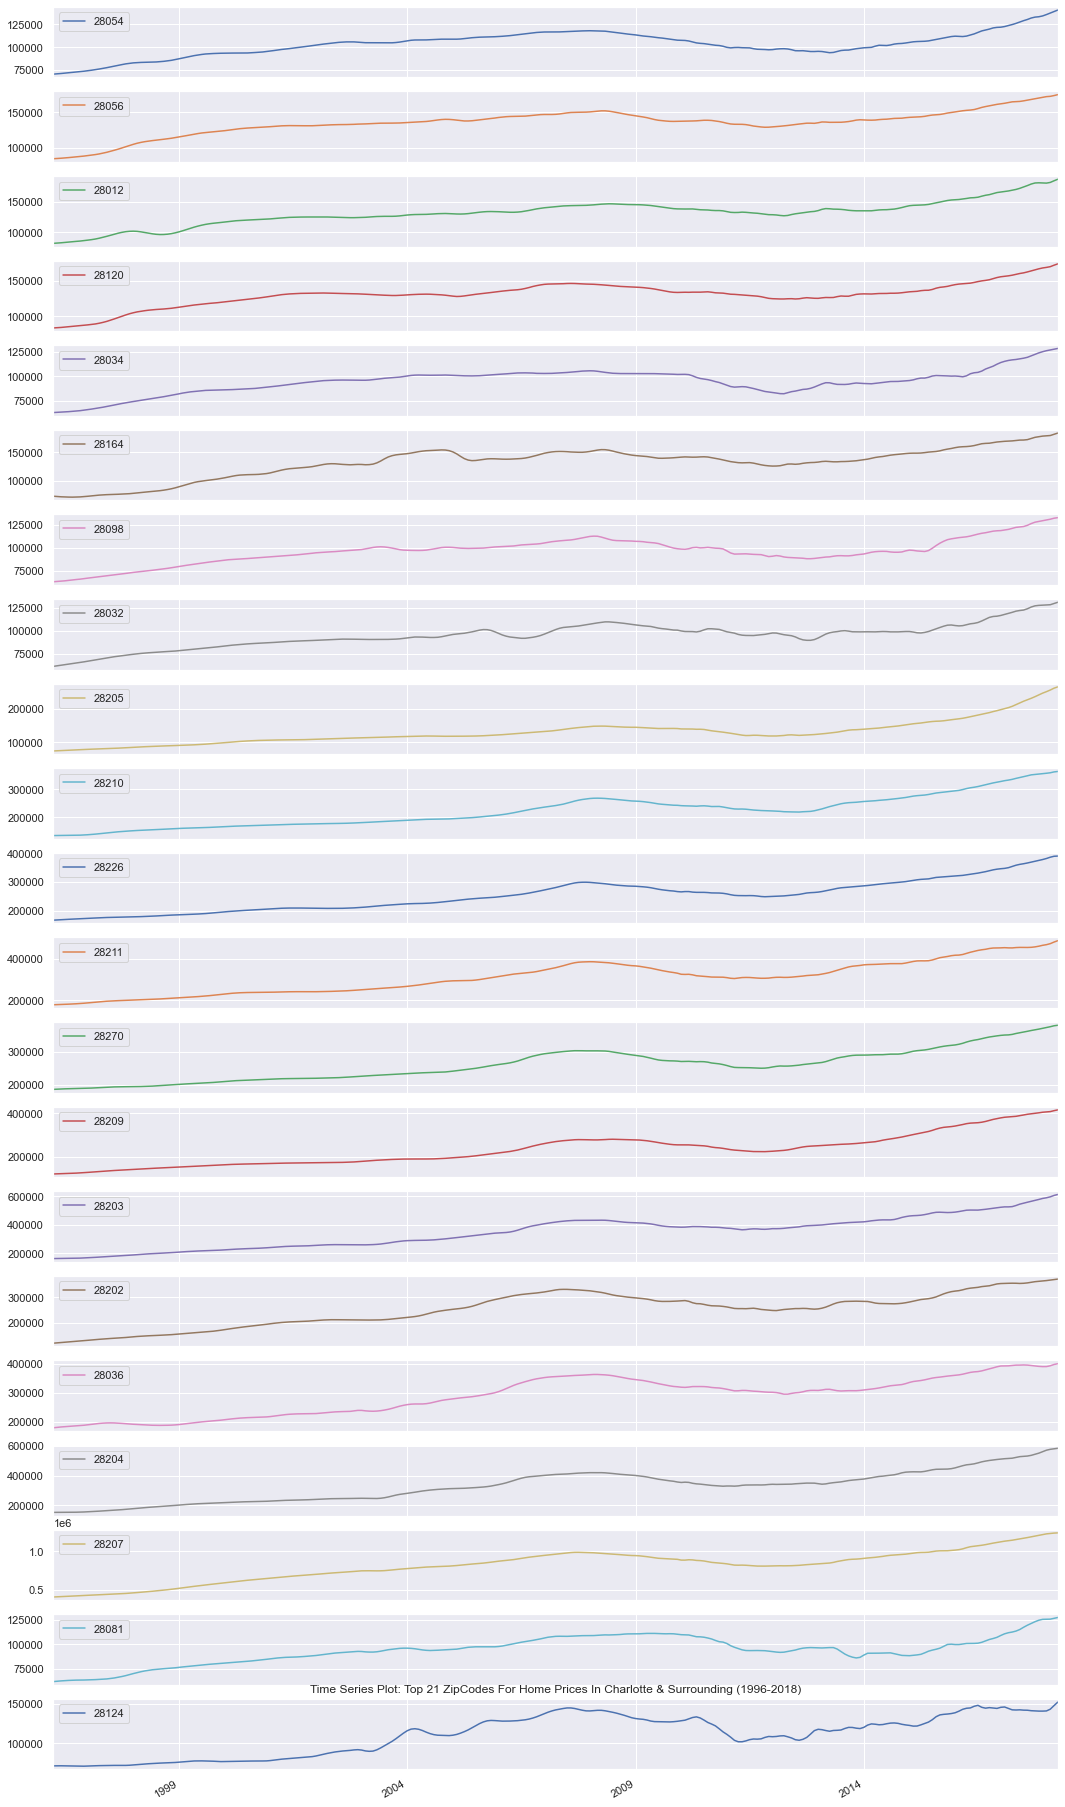

In [67]:
top_21_series.plot(figsize=(18,36), legend='best', subplots=True)
plt.title('Time Series Plot: Top 21 ZipCodes For Home Prices In Charlotte & Surrounding (1996-2018)')

Why I've Decided To Focus On Zip Code 28204:
--
Zip code 28204 is located in Charlotte, NC and has the highest historical ROI (hROI). I'll be focusing on this zip code for initial Time Series modeling.

Text(0.5, 1.0, 'Time Series Plot: Zip Code 28204')

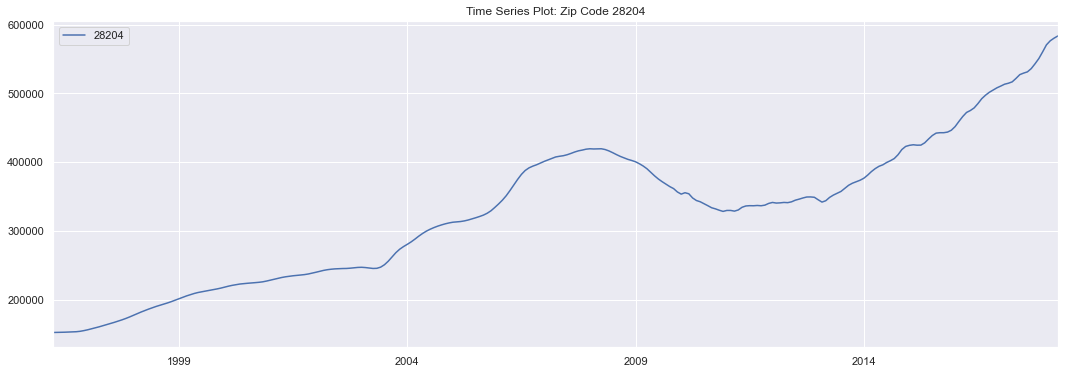

In [68]:
# Choosing to focus on zip code 28204
top_21_series['28204'].plot(figsize=(18,6), legend='best')
plt.title('Time Series Plot: Zip Code 28204')

In [69]:
top_zip_series = top_21_series['28204']

In [70]:
top_zip_series_yr = top_zip_series.groupby(pd.Grouper(freq='A'))

Text(0, 0.5, 'Home Prices (Mean)')

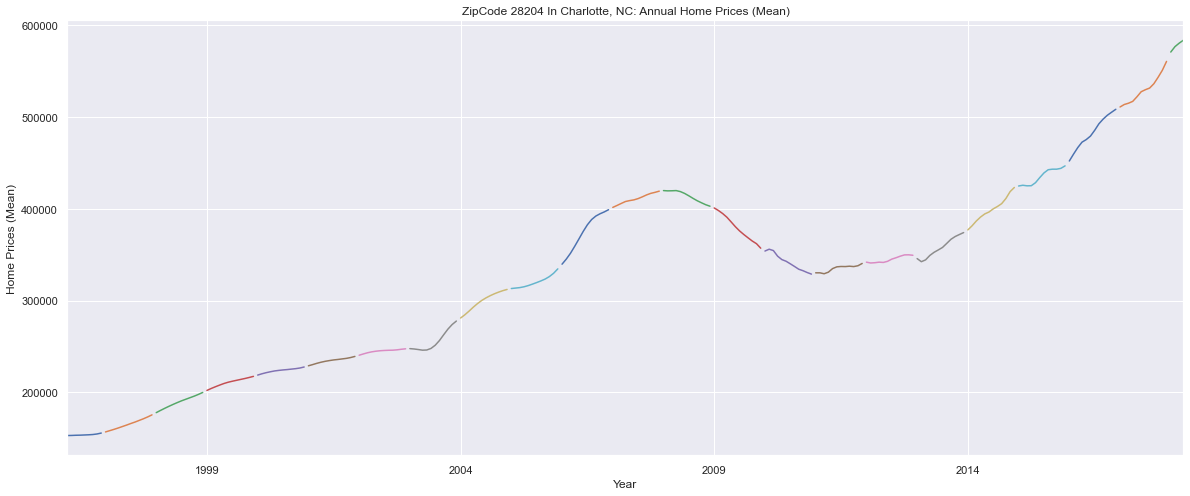

In [71]:
top_zip_series_yr.plot(figsize=(20,8), legend=False)
plt.title('ZipCode 28204 In Charlotte, NC: Annual Home Prices (Mean)')
plt.xlabel('Year')
plt.ylabel('Home Prices (Mean)')

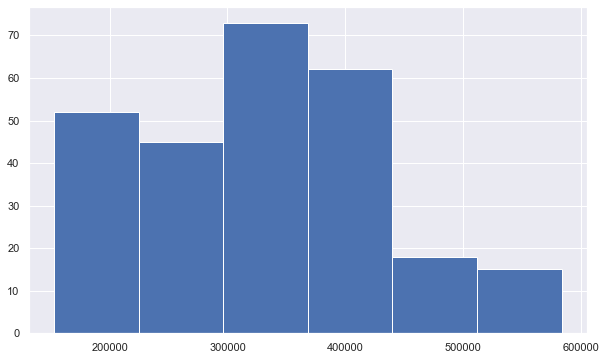

In [72]:
# Checking for the distribution of values as to whether it is Gaussian
top_zip_series.hist(figsize = (10,6), bins=6);

The Distribution Doesn't Appear To Be Gaussian
--
I've tried with 3,5,7,and 9 bins but still I'm not seeing a Gaussian (or normal) distribution. I'll check the density.

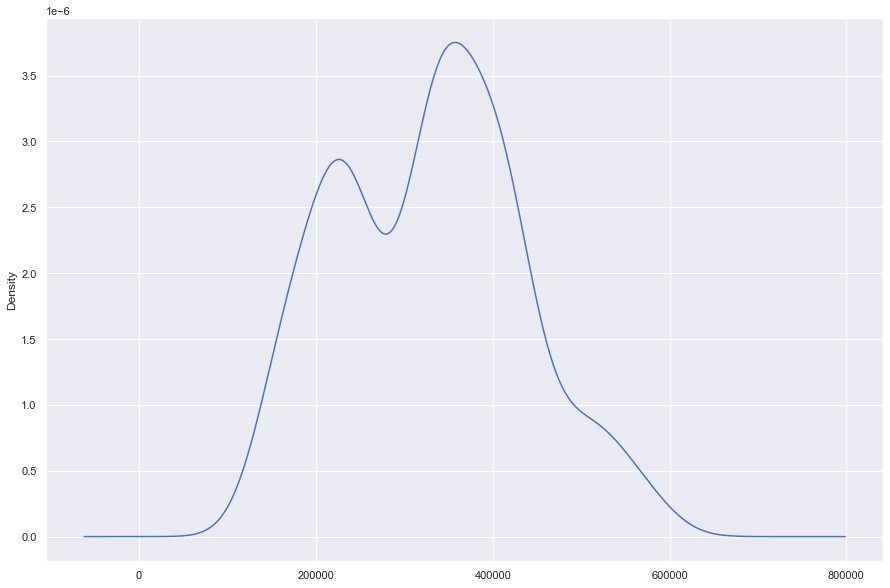

In [73]:
# Checking for normal distribution with a Kernal Density Estimation plot
top_zip_series.plot(kind='kde', figsize = (15,10));

Results: More Gaussian / Normal Distribution Is Revealed
--
It appears from the KDE plot that the distribution is indeed somewhat normal. However, let's check the mean of this distribution to get a sense for where the standard distribution ought to be. 

In [74]:
top_zip_series.describe()

count       265.000000
mean     328582.641509
std      104189.254160
min      153100.000000
25%      237100.000000
50%      337900.000000
75%      402700.000000
max      583400.000000
Name: 28204, dtype: float64

Somewhat of a Non-Normal Distribution???
--
I'll need to research this more to determine whether this is a normal-ish Gaussian distribution or whether it isn't sufficient to describe it as such. As of now, I'd say that it is indeed Gaussian but only somewhat. 

Nevertheless, I'll do a test to officially confirm whether this is Gaussian and there may be a need to reshape the distribution somehow, as it appears to either be a <b>linear</b> or <b>exponential</b> distribution, which would mean the distribution was non-stationary, and I'd have to employ methods to improve its stationarity.

I'll check for trends now.

In [75]:
# Checking the rolling mean and standard deviation
roll_mean = top_zip_series.rolling(window=10, center=False).mean()
roll_std = top_zip_series.rolling(window=10, center=False).std()

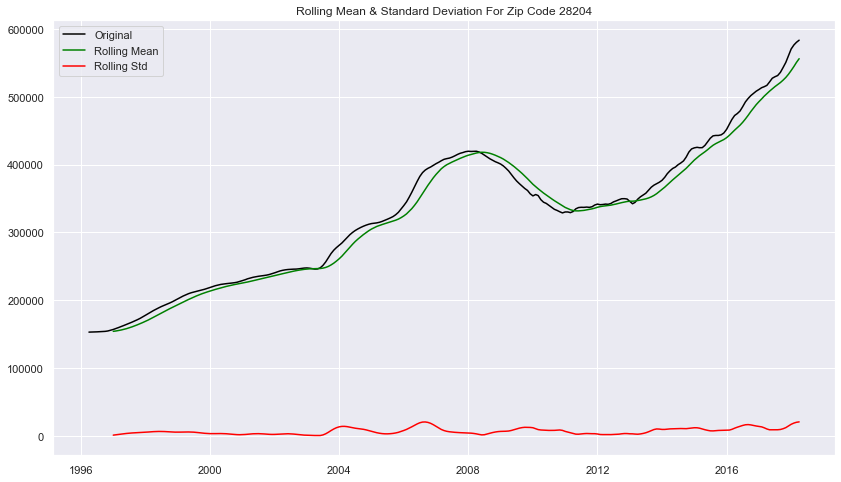

In [76]:
fig = plt.figure(figsize=(14,8))
plt.plot(top_zip_series, color='black', label='Original')
plt.plot(roll_mean, color='green', label='Rolling Mean')
plt.plot(roll_std, color='red', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation For Zip Code 28204')
plt.show(block=False)

Standard Deviation Is Constant While Mean Is Not
--
Based on the Rolling Mean & STD tests, I can confirm with significant confidence that this distribution is <b>not stationary.</b> I believe a Dickey-Fuller test will further prove that this distribution is not stationary.

In [77]:
# Dickey-Full test
from statsmodels.tsa.stattools import adfuller
df_test = adfuller(top_zip_series)

df_results = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in df_test[4].items():
    df_results['Critical Value (%s)'%key] = value
    
print ('Results of Dickey-Fuller test: \n')
print ('-----------')
print(df_results)

Results of Dickey-Fuller test: 

-----------
Test Statistic                  -0.181252
p-value                          0.940720
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


Confirmation of Non-Stationary Series
--
The Dickey-Fuller test results show that this Series is non-stationary, with a p-value well above all of the Critical Values.

In [78]:
from numpy import log
from matplotlib import pyplot

In [79]:
# Performing a log-transform of the Series in order to check on distribution again
X = top_zip_series.values
X = log(X)

(array([20., 13., 24., 32.,  9., 41., 45., 52., 13., 16.]),
 array([11.93884658, 12.07262476, 12.20640293, 12.34018111, 12.47395928,
        12.60773746, 12.74151563, 12.87529381, 13.00907199, 13.14285016,
        13.27662834]),
 <BarContainer object of 10 artists>)

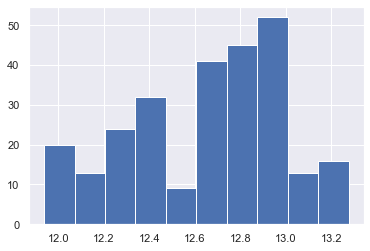

In [80]:
pyplot.hist(X)

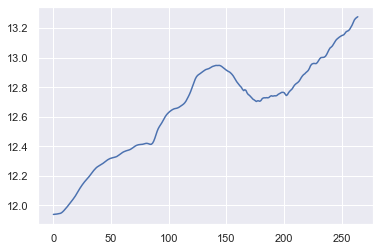

In [81]:
pyplot.plot(X)

In [82]:
df_test = adfuller(X)

df_results = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in df_test[4].items():
    df_results['Critical Value (%s)'%key] = value
    
print ('Results of Dickey-Fuller test: \n')
print ('-----------')
print(df_results)

Results of Dickey-Fuller test: 

-----------
Test Statistic                  -0.964899
p-value                          0.765850
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


Non-Staionarity Remains
--
After log-transforming the Series and running another DF test, the non-stationarity remains. I'll need to remove the trends from this Series. Between 100-175 there appears to be exponential growth, and then there is a return to the linearity.

But, I'd like to check on the square and cube roots first.

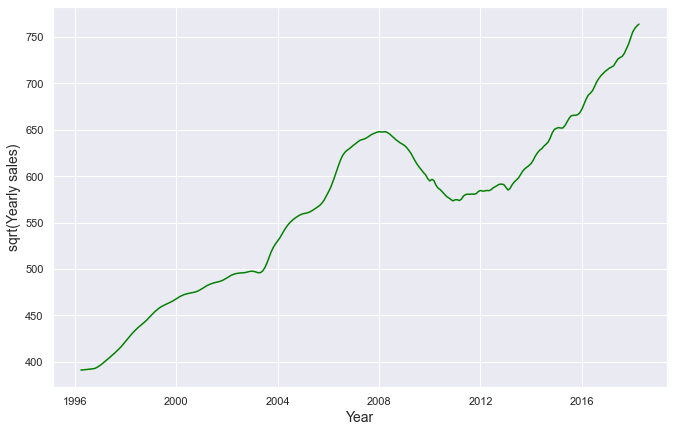

In [83]:
data = pd.Series(np.sqrt(top_zip_series), index=top_zip_series.index)
fig = plt.figure(figsize=(11,7))
plt.plot(data, color='green')
plt.xlabel('Year', fontsize=14)
plt.ylabel('sqrt(Yearly sales)', fontsize=14)
plt.show()

The Impact of Pre & Post 2008: 
--
It's been clear but I'll address it here -- the market activity and home prices before and after 2008 represent an outlier in the Series. However, because the other zip codes will likely have been impacted by this period as well, I'll be keeping it as apart of the Series. However, now what I'll do is remove the trends as completely as possible.

Firstly, I'll try <b>differencing.</b>

In [84]:
# Taking a difference of 1 with the original Series (without the log-transformation)
top_zip_series_diff = top_zip_series.diff(periods=1)
top_zip_series_diff.head(10)

1996-04-01       NaN
1996-05-01     100.0
1996-06-01     200.0
1996-07-01     100.0
1996-08-01     200.0
1996-09-01     200.0
1996-10-01     300.0
1996-11-01     600.0
1996-12-01    1000.0
1997-01-01    1200.0
Name: 28204, dtype: float64

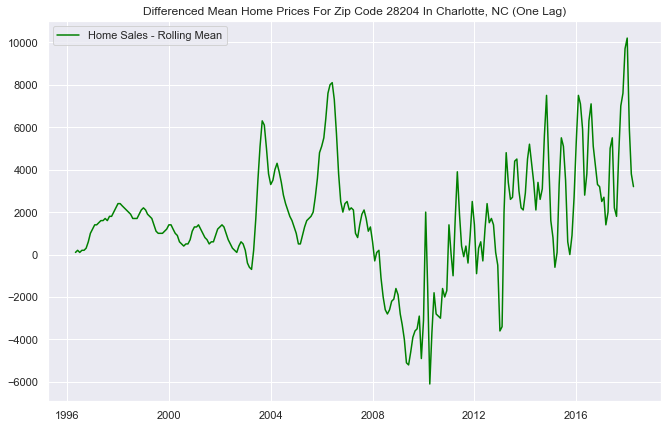

In [85]:
fig = plt.figure(figsize=(11,7))
plt.plot(top_zip_series_diff, color='green',label='Home Sales - Rolling Mean')
plt.legend(loc='best')
plt.title('Differenced Mean Home Prices For Zip Code 28204 In Charlotte, NC (One Lag)')
plt.show(block=False)

In [86]:
# Dickey - Full
df_test_1diff = adfuller(top_zip_series_diff[1:])

df_results_1diff = pd.Series(df_test_1diff[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in df_test_1diff[4].items():
    df_results_1diff['Critical Value (%s)'%key] = value
    
print ('Results of Dickey-Fuller test: \n')
print ('-----------')
print(df_results_1diff)

Results of Dickey-Fuller test: 

-----------
Test Statistic                  -2.074186
p-value                          0.255020
#Lags Used                      15.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [87]:
# Adjusting the lags to 6
top_zip_series_diff_6 = top_zip_series.diff(periods=6)
top_zip_series_diff_6.head(10)

1996-04-01       NaN
1996-05-01       NaN
1996-06-01       NaN
1996-07-01       NaN
1996-08-01       NaN
1996-09-01       NaN
1996-10-01    1100.0
1996-11-01    1600.0
1996-12-01    2400.0
1997-01-01    3500.0
Name: 28204, dtype: float64

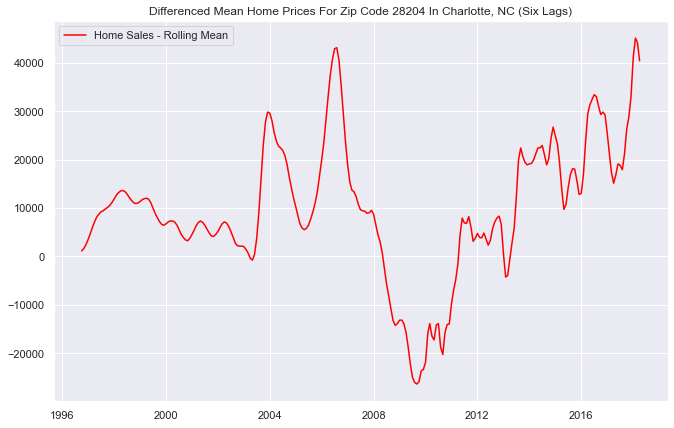

In [88]:
fig = plt.figure(figsize=(11,7))
plt.plot(top_zip_series_diff_6, color='red',label='Home Sales - Rolling Mean')
plt.legend(loc='best')
plt.title('Differenced Mean Home Prices For Zip Code 28204 In Charlotte, NC (Six Lags)')
plt.show(block=False)

In [89]:
# Dickey - Full
df_test_6diff = adfuller(top_zip_series_diff_6[6:])

df_results_6diff = pd.Series(df_test_6diff[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in df_test_6diff[4].items():
    df_results_6diff['Critical Value (%s)'%key] = value
    
print ('Results of Dickey-Fuller test: \n')
print ('-----------')
print(df_results_6diff)

Results of Dickey-Fuller test: 

-----------
Test Statistic                  -1.481912
p-value                          0.542439
#Lags Used                      16.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64


In [90]:
top_zip_series_diff_18 = top_zip_series.diff(periods=18)
top_zip_series_diff_18.tail(10)

2017-07-01    77600.0
2017-08-01    71900.0
2017-09-01    69500.0
2017-10-01    70600.0
2017-11-01    75400.0
2017-12-01    81300.0
2018-01-01    85200.0
2018-02-01    84000.0
2018-03-01    82700.0
2018-04-01    81700.0
Name: 28204, dtype: float64

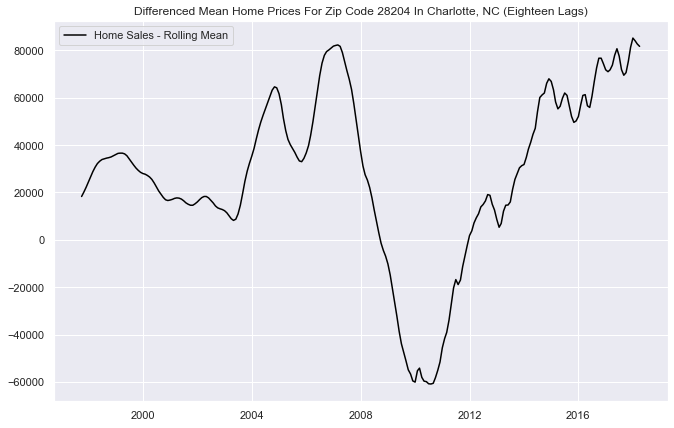

In [91]:
fig = plt.figure(figsize=(11,7))
plt.plot(top_zip_series_diff_18, color='black',label='Home Sales - Rolling Mean')
plt.legend(loc='best')
plt.title('Differenced Mean Home Prices For Zip Code 28204 In Charlotte, NC (Eighteen Lags)')
plt.show(block=False)

In [92]:
# Dickey - Full
df_test_18diff = adfuller(top_zip_series_diff_18[18:])

df_results_18diff = pd.Series(df_test_18diff[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in df_test_18diff[4].items():
    df_results_18diff['Critical Value (%s)'%key] = value
    
print ('Results of Dickey-Fuller test: \n')
print ('-----------')
print(df_results_18diff)

Results of Dickey-Fuller test: 

-----------
Test Statistic                  -1.246284
p-value                          0.653375
#Lags Used                      16.000000
Number of Observations Used    230.000000
Critical Value (1%)             -3.459106
Critical Value (5%)             -2.874190
Critical Value (10%)            -2.573512
dtype: float64


Differencing Still Doesn't Remove Trends
--
Even with using eighteen lags, the Series remains impacted by fluctuating covariance, heteroscedasticity as well as the mean. It appears that Differencing doesn't help to achieve stationairty. I'll do a Seasonal Decompose now to complete as full as possible of a removal of trends & seasonality.

But first, I'd like to make it easier to check for Stationarity in the event I need to.

In [93]:
# Creating a function for checking stationarity

def stationarity_checker(ts):
    
    from statsmodels.tsa.stattools import adfuller
    
    # For Rolling Statistics -- as needed
    roll_mean = ts.rolling(window=12, center=False).mean()
    roll_std = ts.rolling(window=12, center=False).std()
    
    # Dickey Full
    df_test = adfuller(ts) 
    
    # Rolling statistics -- plotting:
    fig = plt.figure(figsize=(12,6))
    original = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='green', label='Rolling Mean')
    std = plt.plot(roll_std, color='red', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey Full
    print('Results of Dickey-Fuller Test: \n')
    print('---------------------------------')

    df_results = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', 
                                             '# of Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_results['The Critical Value (%s)'%key] = value
        
    print(df_results)
    print('---------------------------------')
    
    # Plot Time Series
    ts.plot(figsize=(10,4), color='purple');
    plt.title('Initial Plot of Time Series In Question')
    
    return None

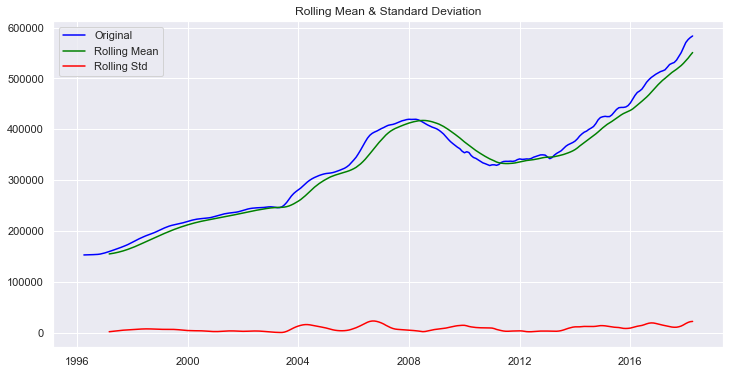

Results of Dickey-Fuller Test: 

---------------------------------
Test Statistic                  -0.181252
p-value                          0.940720
# of Lags Used                  16.000000
Number of Observations Used    248.000000
The Critical Value (1%)         -3.456996
The Critical Value (5%)         -2.873266
The Critical Value (10%)        -2.573019
dtype: float64
---------------------------------


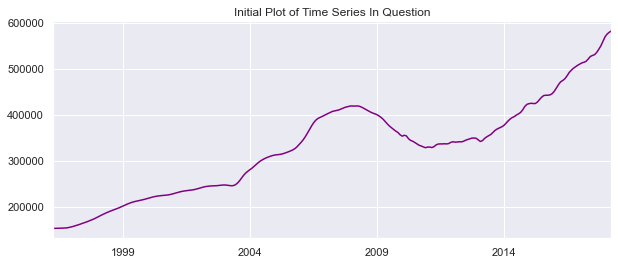

In [94]:
stationarity_checker(top_zip_series)

Performing Seasonal Decompose: Additive
--
Based on the way the Time Series looks from the visual test (and statistical tests) I'll perform a Seasonal Decompose using the Additive model, as the Series appears to show Additive seasonality more than Multiplicative seasonality.

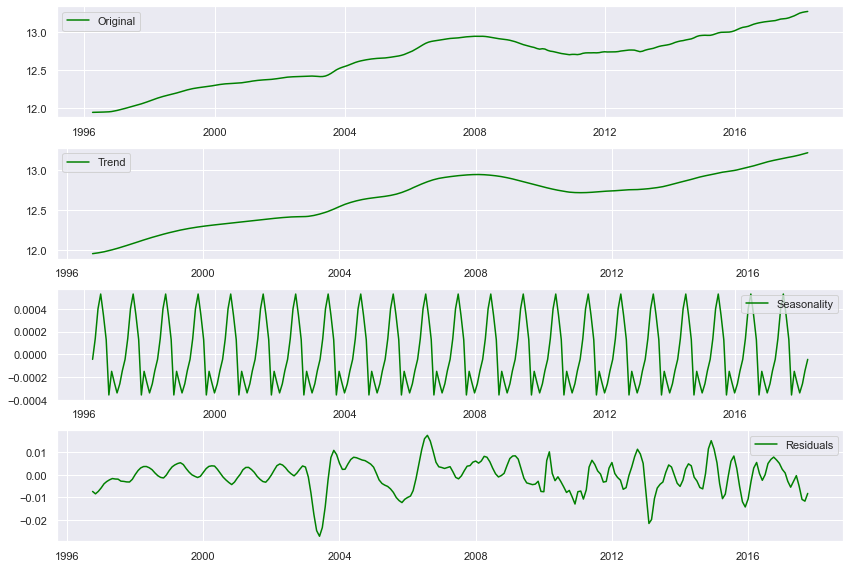

In [95]:
# Performing Seasonl Decompose analysis on Time Series

from statsmodels.tsa.seasonal import seasonal_decompose
decom = seasonal_decompose(np.log(top_zip_series))

# Actualize trend, seasonality, and residuals variables
trend = decom.trend
seasonal = decom.seasonal
residual = decom.resid

# Plotting the statistical results
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(top_zip_series), label='Original', color='green')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='green')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='green')
plt.legend(loc='best')
plt.tight_layout()

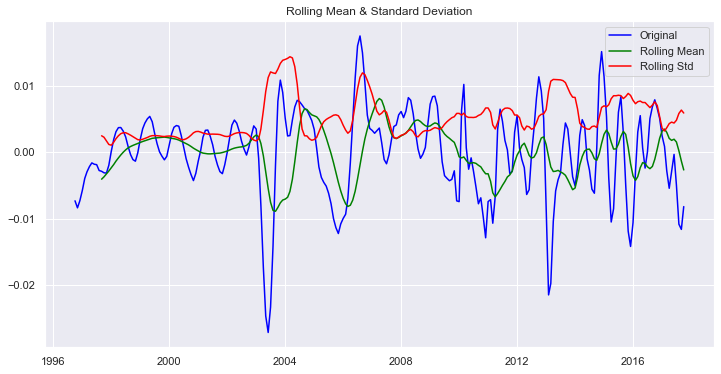

Results of Dickey-Fuller Test: 

---------------------------------
Test Statistic                  -4.921790
p-value                          0.000032
# of Lags Used                  13.000000
Number of Observations Used    239.000000
The Critical Value (1%)         -3.458011
The Critical Value (5%)         -2.873710
The Critical Value (10%)        -2.573256
dtype: float64
---------------------------------


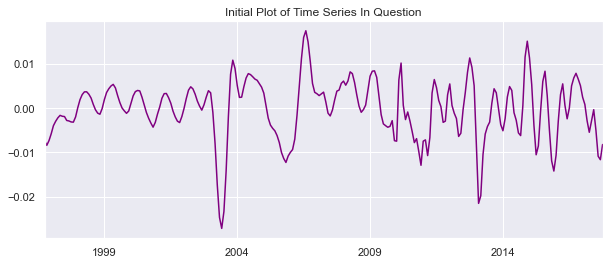

In [96]:
# Checking for stationarity -- with Residuals of the Time Series
series_resid = residual
series_resid.dropna(inplace=True)

stationarity_checker(series_resid)

How Predictable Is The Series: Using Autocorrelation To Check
--
Now, I'll check on the Autocorrelation of the Series.

In [120]:
# Implementing the Time Series Autocorrelation

top_zip_autocorr = series_resid.shift(periods=1)
top_zip_autocorr.head()

1996-10-01         NaN
1996-11-01   -0.007327
1996-12-01   -0.008384
1997-01-01   -0.007316
1997-02-01   -0.005774
Name: resid, dtype: float64

          resid     resid
resid  1.000000  0.852371
resid  0.852371  1.000000
AxesSubplot(0.125,0.125;0.775x0.755)


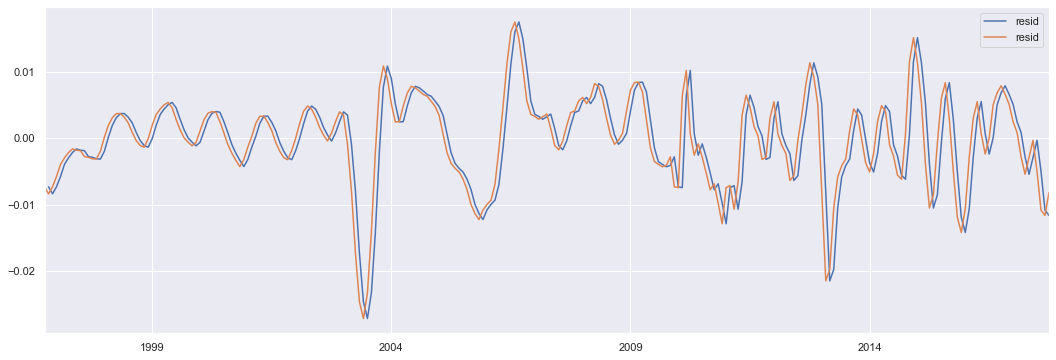

In [121]:
# Plotting 1-lag Autocorrelation

lag_one = pd.concat([top_zip_autocorr, series_resid], axis=1)

print(lag_one.corr());
print(lag_one.plot(figsize=(18,6)))

In [122]:
# Creating function to check Autocorrelation at n-lags

def acorr(series,number_of_lags):
    
    shifter = series.shift(periods=number_of_lags)
    orig_with_lags = pd.concat([shifter,series], axis=1)
    print(orig_with_lags.corr());
    print(orig_with_lags.plot(figsize=(18,6)))

          resid     resid
resid  1.000000  0.530396
resid  0.530396  1.000000
AxesSubplot(0.125,0.125;0.775x0.755)


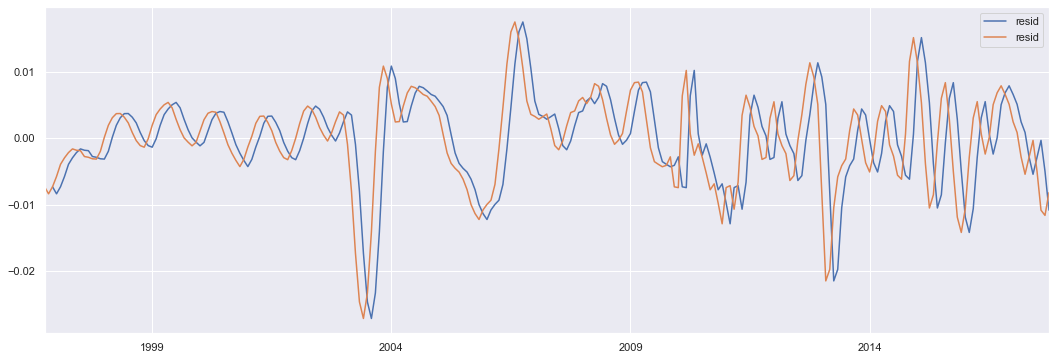

In [123]:
acorr(series_resid,2)

          resid     resid
resid  1.000000  0.213133
resid  0.213133  1.000000
AxesSubplot(0.125,0.125;0.775x0.755)


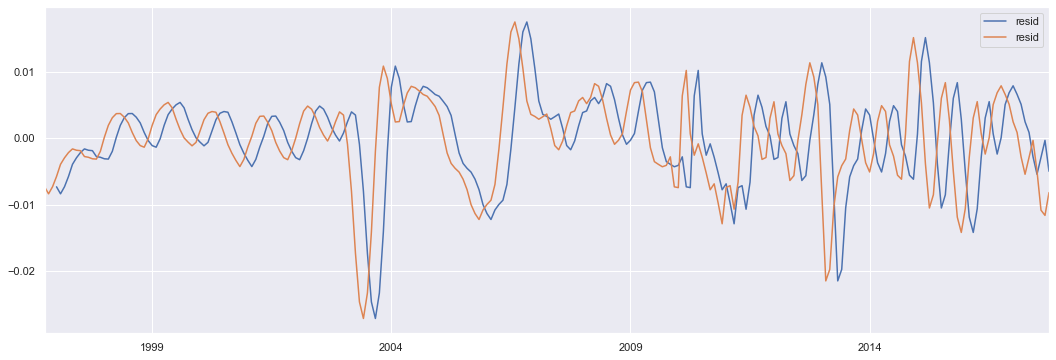

In [124]:
acorr(series_resid,3)

          resid     resid
resid  1.000000 -0.016357
resid -0.016357  1.000000
AxesSubplot(0.125,0.125;0.775x0.755)


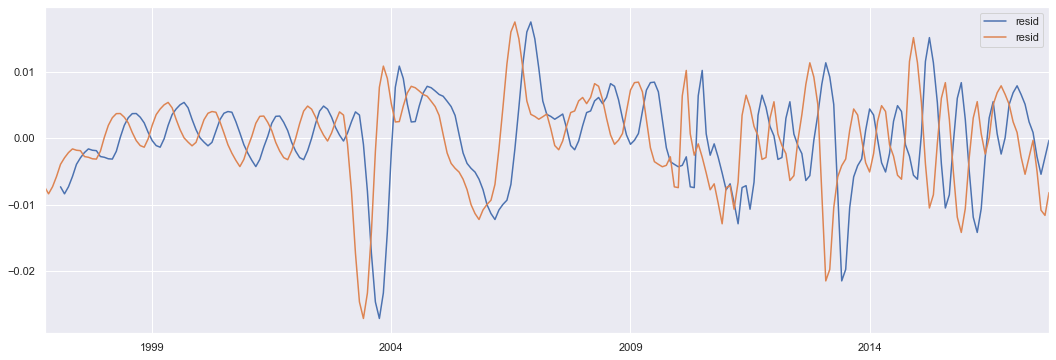

In [125]:
acorr(series_resid,4)

Series Residual Autocorrelation Results:
--
It appears that there is significance around 3 or 4 shifts

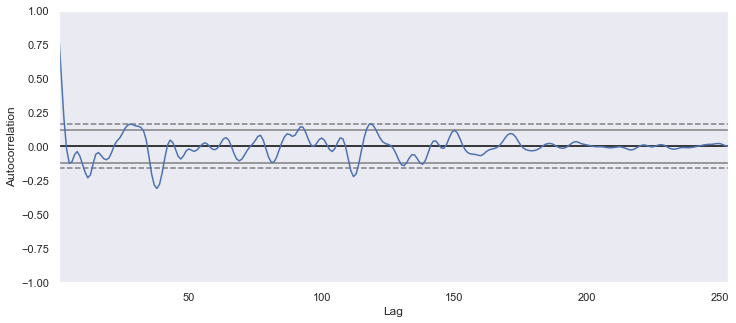

In [126]:
# Employing the Auto-Correlation function
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(series_resid);

Now For PACF
--
I'll plot a PACF (Partial Auto-Correlation Function) to further investigate.

C:\Users\samsung\anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


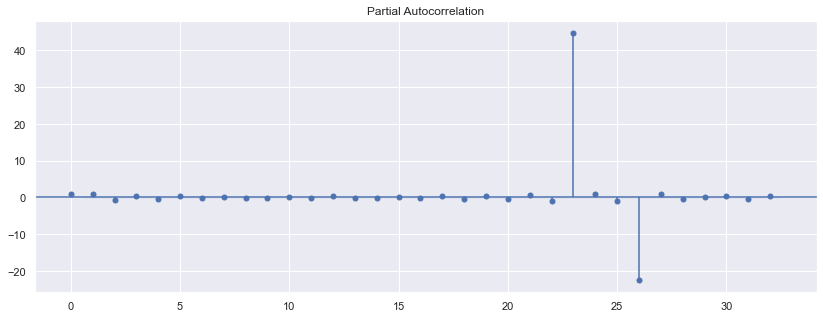

In [127]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(series_resid, lags=32);

PACF Analysis for Residuals:
--
A lag of 23 is best to start with for terms related to PACF, according to these results.

Terms For Seasonal portion of Series:
--

Now, I'll check on which terms may be idea to start with for Seasonality

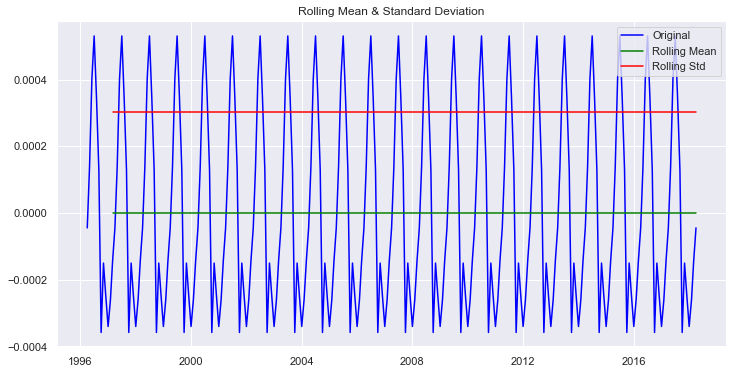

Results of Dickey-Fuller Test: 

---------------------------------
Test Statistic                -8.933587e+13
p-value                        0.000000e+00
# of Lags Used                 1.200000e+01
Number of Observations Used    2.520000e+02
The Critical Value (1%)       -3.456569e+00
The Critical Value (5%)       -2.873079e+00
The Critical Value (10%)      -2.572919e+00
dtype: float64
---------------------------------


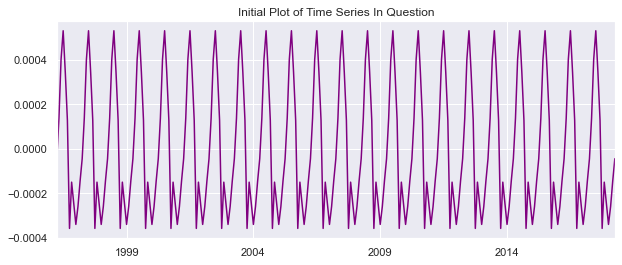

In [128]:
# Checking for stationarity -- with Residuals of the Time Series
series_season = seasonal
series_season.dropna(inplace=True)

stationarity_checker(series_season)

In [129]:
# Implementing the Time Series Autocorrelation

top_zip_autocorr = series_season.shift(periods=1)
top_zip_autocorr.head()

1996-04-01         NaN
1996-05-01   -0.000044
1996-06-01    0.000138
1996-07-01    0.000402
1996-08-01    0.000531
Name: seasonal, dtype: float64

          seasonal  seasonal
seasonal  1.000000  0.739763
seasonal  0.739763  1.000000
AxesSubplot(0.125,0.125;0.775x0.755)


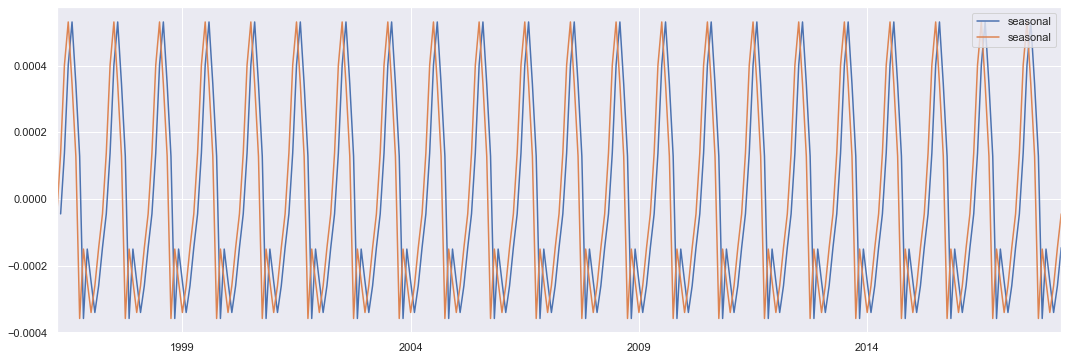

In [130]:
# Checking A-corr for 1 lag for seasonal component of the Series
acorr(series_season,1)

          seasonal  seasonal
seasonal  1.000000  0.359677
seasonal  0.359677  1.000000
AxesSubplot(0.125,0.125;0.775x0.755)


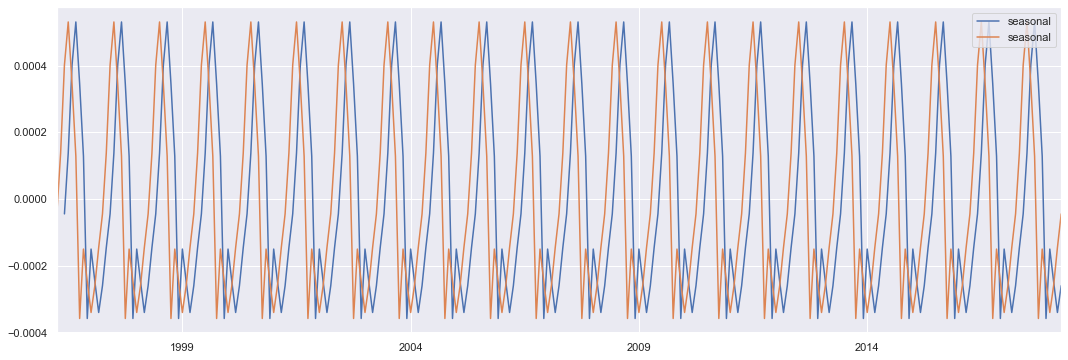

In [131]:
acorr(series_season,2)

          seasonal  seasonal
seasonal   1.00000  -0.07542
seasonal  -0.07542   1.00000
AxesSubplot(0.125,0.125;0.775x0.755)


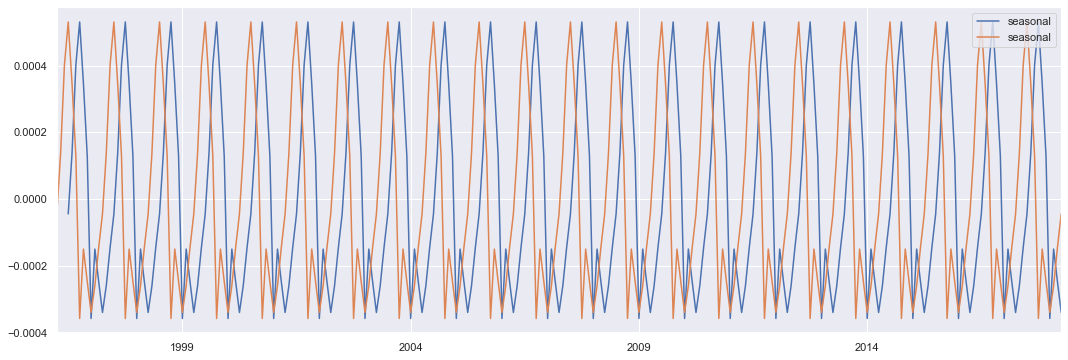

In [132]:
acorr(series_season,3)

Auto-Correlation Shifts of Significance
--
It appears that it may be best to start with 2 or 3 shifts for the terms.

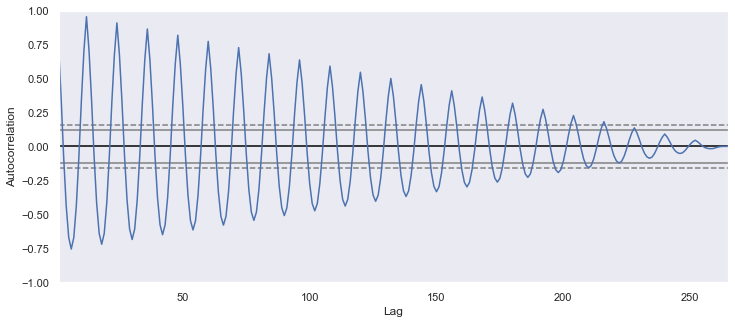

In [133]:
# Employing the Auto-Correlation function on the Seasonal portion of the Series
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(series_season);

C:\Users\samsung\anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


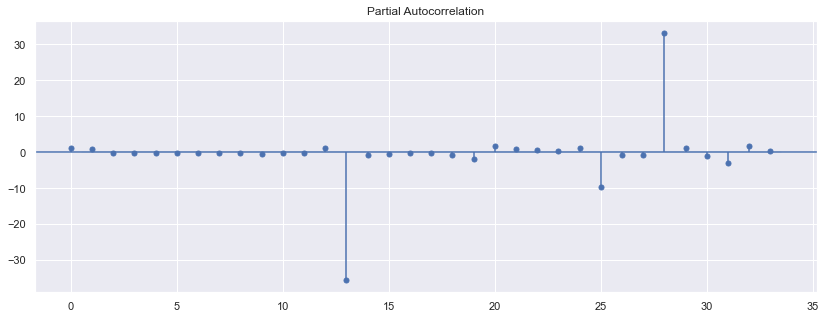

In [140]:
# Running PACF to investigate further 

rcParams['figure.figsize'] = 14, 5

plot_pacf(series_season, lags=33);

How Is 2008's Great Recession Impacting The Series?
--
After doing analysis on this zip code (28204), what I'd like to do is remove all data prior to 2010, and start from there. 

I'd like to ascertain how the 8-year Series looks, without the "Great Recession" affect.

In [106]:
# Taking the Series from start month of 01-2010
series_2010 = top_21_series['2010':]

In [107]:
series_2010

,28054,28056,28012,28120,28034,28164,28098,28032,28205,28210,...,28211,28270,28209,28203,28202,28036,28204,28207,28081,28124
2010-01-01,107500.0,137500.0,138200.0,133900.0,102000.0,141400.0,98800.0,99800.0,139700.0,241700.0,...,326600.0,269800.0,255400.0,382500.0,286700.0,319400.0,353900.0,884700.0,109900.0,128700.0
2010-02-01,107400.0,137600.0,138100.0,134000.0,102100.0,141800.0,98600.0,99200.0,139600.0,241100.0,...,325900.0,270000.0,255500.0,383100.0,287700.0,318800.0,355900.0,884400.0,109800.0,129400.0
2010-03-01,106800.0,137600.0,138200.0,133900.0,101800.0,141600.0,99200.0,99100.0,139800.0,240900.0,...,326500.0,270300.0,255300.0,385300.0,284700.0,319900.0,354400.0,889300.0,109600.0,131100.0
2010-04-01,105800.0,137800.0,138200.0,134100.0,100600.0,141300.0,100400.0,99100.0,139400.0,240400.0,...,323800.0,269700.0,254400.0,387100.0,279100.0,321600.0,348300.0,887300.0,108700.0,132800.0
2010-05-01,104700.0,138000.0,137600.0,134100.0,99000.0,141400.0,100700.0,98700.0,138700.0,239700.0,...,319500.0,269100.0,253100.0,387100.0,275700.0,321800.0,344600.0,880700.0,107800.0,133600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,134400.0,171100.0,180500.0,168200.0,125100.0,177800.0,129400.0,127900.0,247100.0,356200.0,...,466800.0,370000.0,404400.0,584300.0,364200.0,390600.0,560300.0,1216100.0,125600.0,140900.0
2018-01-01,135900.0,171900.0,180300.0,169000.0,126100.0,178300.0,130200.0,128000.0,251500.0,357400.0,...,469900.0,372300.0,405600.0,588900.0,366100.0,390700.0,570500.0,1225200.0,125700.0,141100.0
2018-02-01,137600.0,172300.0,181400.0,170000.0,126900.0,178800.0,131100.0,128400.0,256300.0,359100.0,...,474800.0,374800.0,407300.0,595500.0,368000.0,393400.0,576400.0,1230900.0,125800.0,143300.0
2018-03-01,139400.0,173400.0,184100.0,172100.0,127700.0,180900.0,132200.0,129700.0,262000.0,362200.0,...,482600.0,377700.0,411600.0,605400.0,370300.0,397900.0,580200.0,1235400.0,126700.0,147900.0


Text(0.5, 1.0, 'Time Series Plot: Zip Code 28204 (2010-2018)')

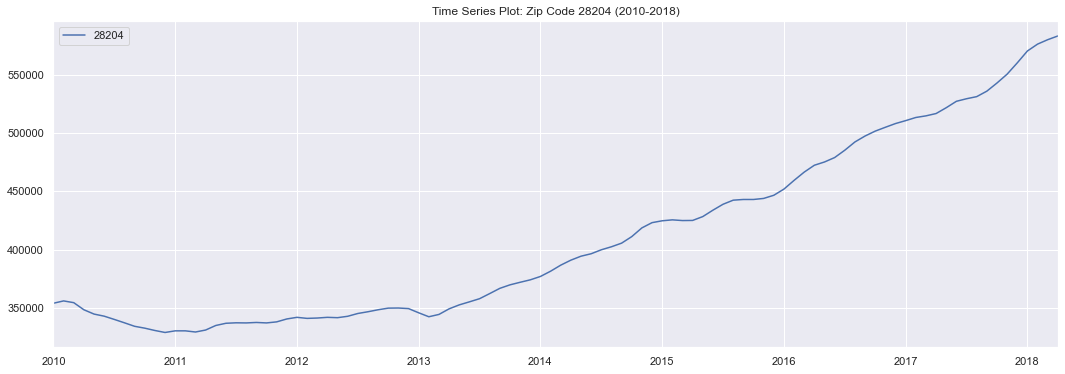

In [108]:
series_2010['28204'].plot(figsize=(18,6), legend='best')
plt.title('Time Series Plot: Zip Code 28204 (2010-2018)')

In [109]:
series_28204_2010 = series_2010['28204']

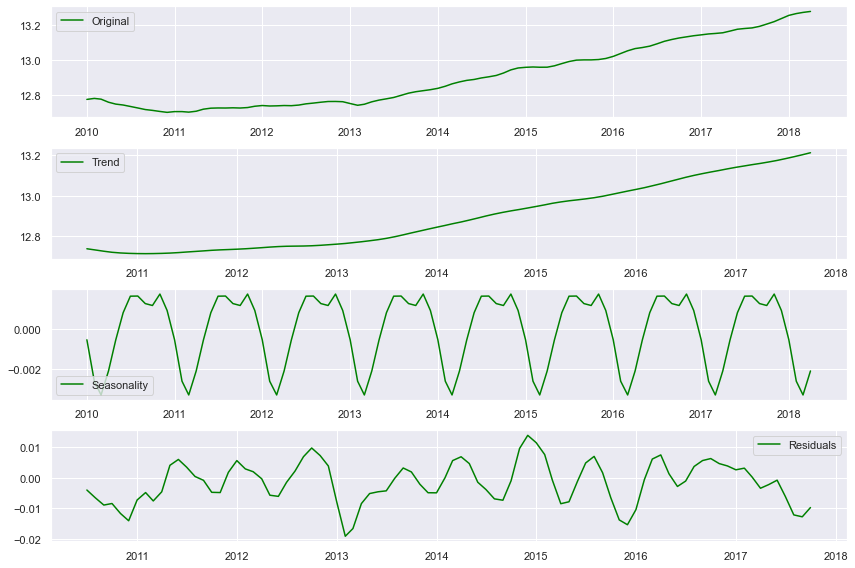

In [171]:
decom_2 = seasonal_decompose(np.log(series_28204_2010), model='additive')

# Actualize trend, seasonality, and residuals variables
trend2 = decom_2.trend
seasonal2 = decom_2.seasonal
residual2 = decom_2.resid

# Plotting the statistical results
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(series_28204_2010), label='Original', color='green')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend2, label='Trend', color='green')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal2, label='Seasonality', color='green')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual2, label='Residuals', color='green')
plt.legend(loc='best')
plt.tight_layout()

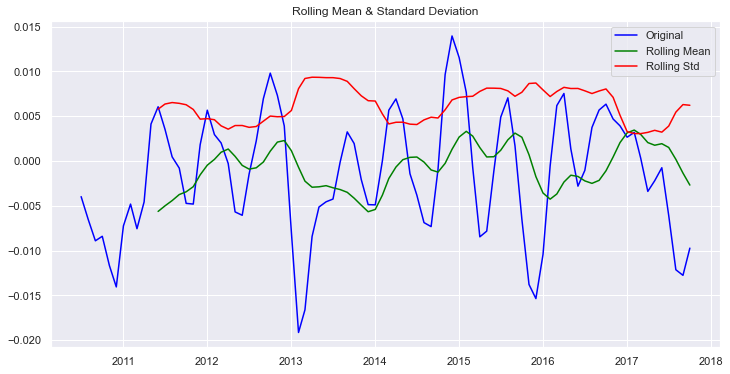

Results of Dickey-Fuller Test: 

---------------------------------
Test Statistic                 -3.701796
p-value                         0.004088
# of Lags Used                 10.000000
Number of Observations Used    77.000000
The Critical Value (1%)        -3.518281
The Critical Value (5%)        -2.899878
The Critical Value (10%)       -2.587223
dtype: float64
---------------------------------


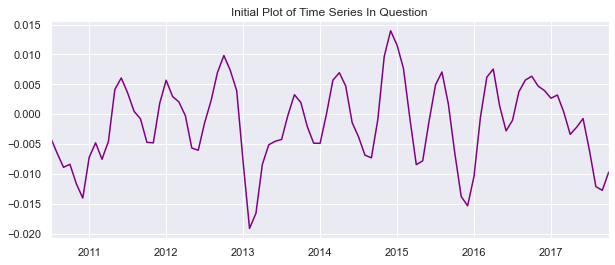

In [172]:
series_resid_2010 = residual2
series_resid_2010.dropna(inplace=True)

stationarity_checker(series_resid_2010)

In [112]:
# Checking for stationarity with 1 difference (since the seasonal decompose shows pretty stable rolling mean and std)
series_28204_2010_diff = series_resid_2010.diff(periods=1)
series_28204_2010.head(10)

2010-01-01    353900.0
2010-02-01    355900.0
2010-03-01    354400.0
2010-04-01    348300.0
2010-05-01    344600.0
2010-06-01    342800.0
2010-07-01    340000.0
2010-08-01    337100.0
2010-09-01    334100.0
2010-10-01    332500.0
Name: 28204, dtype: float64

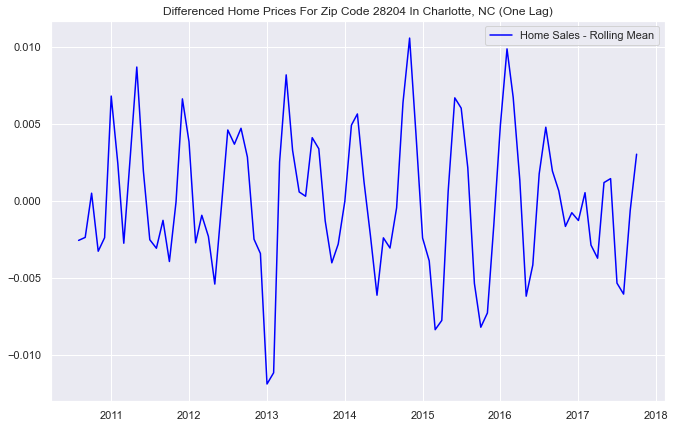

In [113]:
# Plotting the differenced series to check for Stationarity
fig = plt.figure(figsize=(11,7))
plt.plot(series_28204_2010_diff, color='blue',label='Home Sales - Rolling Mean')
plt.legend(loc='best')
plt.title('Differenced Home Prices For Zip Code 28204 In Charlotte, NC (One Lag)')
plt.show(block=False)

          resid     resid
resid  1.000000  0.528295
resid  0.528295  1.000000
AxesSubplot(0.125,0.125;0.775x0.755)


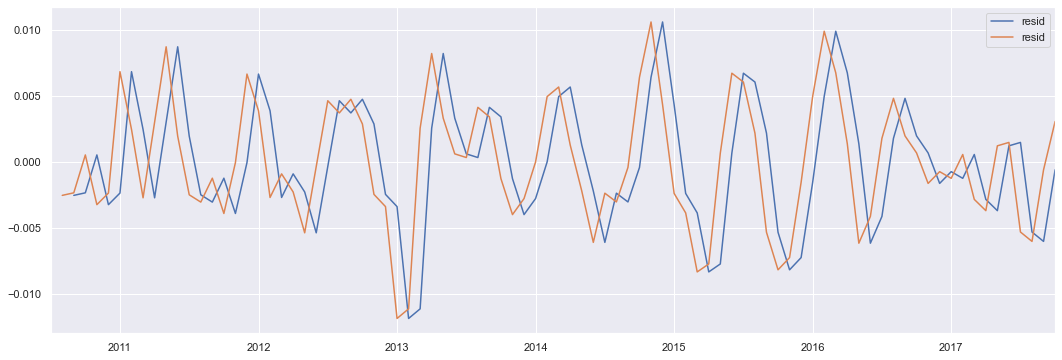

In [114]:
acorr(series_28204_2010_diff,1)

          resid     resid
resid  1.000000 -0.171187
resid -0.171187  1.000000
AxesSubplot(0.125,0.125;0.775x0.755)


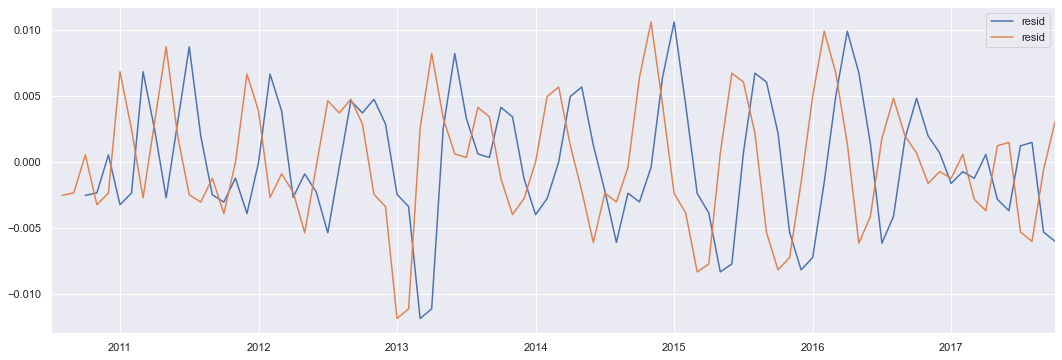

In [141]:
acorr(series_28204_2010_diff,2)

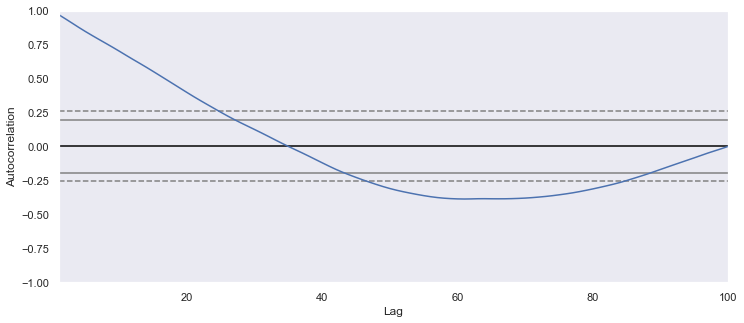

In [142]:
# Employing the Auto-Correlation function on the Seasonal portion of the Series
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(series_28204_2010);

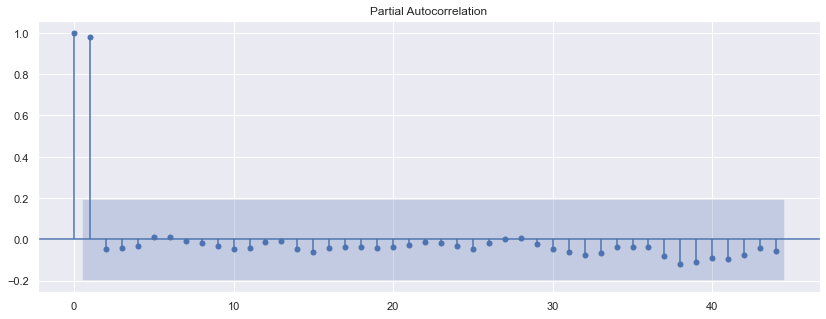

In [154]:
# Partial autocorrelation
rcParams['figure.figsize'] = 14, 5

plot_pacf(series_28204_2010, lags=44);

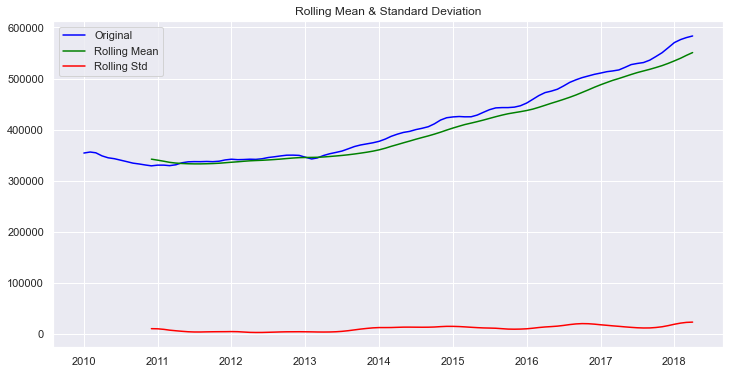

Results of Dickey-Fuller Test: 

---------------------------------
Test Statistic                  2.605580
p-value                         0.999076
# of Lags Used                 11.000000
Number of Observations Used    88.000000
The Critical Value (1%)        -3.506944
The Critical Value (5%)        -2.894990
The Critical Value (10%)       -2.584615
dtype: float64
---------------------------------


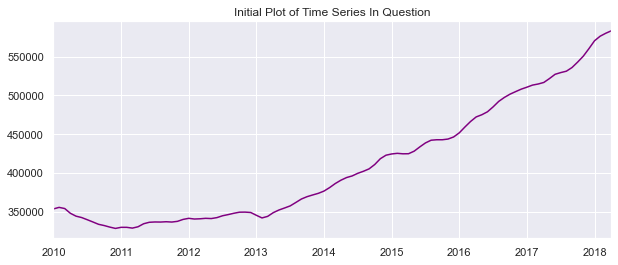

In [147]:
stationarity_checker(series_28204_2010)

In [151]:
# Taking one difference on the Series 
series_28204_2010_1diff = series_28204_2010.diff(periods=1)
series_28204_2010_1diff.head(10)

2010-01-01       NaN
2010-02-01    2000.0
2010-03-01   -1500.0
2010-04-01   -6100.0
2010-05-01   -3700.0
2010-06-01   -1800.0
2010-07-01   -2800.0
2010-08-01   -2900.0
2010-09-01   -3000.0
2010-10-01   -1600.0
Name: 28204, dtype: float64

In [152]:
# Dickey - Full
series_28204_2010_1diff_df_test = adfuller(series_28204_2010_1diff[1:])

series_28204_2010_1diff_df_results = pd.Series(series_28204_2010_1diff_df_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in series_28204_2010_1diff_df_test[4].items():
    series_28204_2010_1diff_df_results['Critical Value (%s)'%key] = value
    
print ('Results of Dickey-Fuller test: \n')
print ('-----------')
print(series_28204_2010_1diff_df_results)

Results of Dickey-Fuller test: 

-----------
Test Statistic                 -1.917586
p-value                         0.323834
#Lags Used                     12.000000
Number of Observations Used    86.000000
Critical Value (1%)            -3.508783
Critical Value (5%)            -2.895784
Critical Value (10%)           -2.585038
dtype: float64


In [153]:
# Taking one difference on the Series 
series_28204_2010_3diff = series_28204_2010.diff(periods=3)
series_28204_2010_3diff.head(10)

2010-01-01        NaN
2010-02-01        NaN
2010-03-01        NaN
2010-04-01    -5600.0
2010-05-01   -11300.0
2010-06-01   -11600.0
2010-07-01    -8300.0
2010-08-01    -7500.0
2010-09-01    -8700.0
2010-10-01    -7500.0
Name: 28204, dtype: float64

In [154]:
# Dickey - Full
series_28204_2010_3diff_df_test = adfuller(series_28204_2010_3diff[3:])

series_28204_2010_3diff_results = pd.Series(series_28204_2010_3diff_df_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in series_28204_2010_3diff_df_test[4].items():
    series_28204_2010_3diff_results['Critical Value (%s)'%key] = value
    
print ('Results of Dickey-Fuller test: \n')
print ('-----------')
print(series_28204_2010_3diff_results)

Results of Dickey-Fuller test: 

-----------
Test Statistic                 -1.474440
p-value                         0.546116
#Lags Used                     11.000000
Number of Observations Used    85.000000
Critical Value (1%)            -3.509736
Critical Value (5%)            -2.896195
Critical Value (10%)           -2.585258
dtype: float64


In [155]:
# Taking one difference on the Series - 5
series_28204_2010_5diff = series_28204_2010.diff(periods=5)
series_28204_2010_5diff.head(10)

2010-01-01        NaN
2010-02-01        NaN
2010-03-01        NaN
2010-04-01        NaN
2010-05-01        NaN
2010-06-01   -11100.0
2010-07-01   -15900.0
2010-08-01   -17300.0
2010-09-01   -14200.0
2010-10-01   -12100.0
Name: 28204, dtype: float64

In [157]:
# Dickey - Full
series_28204_2010_5diff_df_test = adfuller(series_28204_2010_5diff[5:])

series_28204_2010_5diff_results = pd.Series(series_28204_2010_5diff_df_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in series_28204_2010_5diff_df_test[4].items():
    series_28204_2010_5diff_results['Critical Value (%s)'%key] = value
    
print ('Results of Dickey-Fuller test: \n')
print ('-----------')
print(series_28204_2010_5diff_results)

Results of Dickey-Fuller test: 

-----------
Test Statistic                 -1.741271
p-value                         0.409983
#Lags Used                      9.000000
Number of Observations Used    85.000000
Critical Value (1%)            -3.509736
Critical Value (5%)            -2.896195
Critical Value (10%)           -2.585258
dtype: float64


In [174]:
# Taking one difference on the Series - 10
series_28204_2010_10diff = series_28204_2010.diff(periods=10)
series_28204_2010_10diff.head(10)

2010-01-01   NaN
2010-02-01   NaN
2010-03-01   NaN
2010-04-01   NaN
2010-05-01   NaN
2010-06-01   NaN
2010-07-01   NaN
2010-08-01   NaN
2010-09-01   NaN
2010-10-01   NaN
Name: 28204, dtype: float64

In [175]:
# Dickey - Full
series_28204_2010_10diff_df_test = adfuller(series_28204_2010_2diff[10:])

series_28204_2010_10diff_results = pd.Series(series_28204_2010_10diff_df_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in series_28204_2010_10diff_df_test[4].items():
    series_28204_2010_10diff_results['Critical Value (%s)'%key] = value
    
print ('Results of Dickey-Fuller test: \n')
print ('-----------')
print(series_28204_2010_10diff_results)

Results of Dickey-Fuller test: 

-----------
Test Statistic                 -1.378092
p-value                         0.592733
#Lags Used                     12.000000
Number of Observations Used    77.000000
Critical Value (1%)            -3.518281
Critical Value (5%)            -2.899878
Critical Value (10%)           -2.587223
dtype: float64


In [160]:
series_topzip_log = np.log(series_28204_2010)

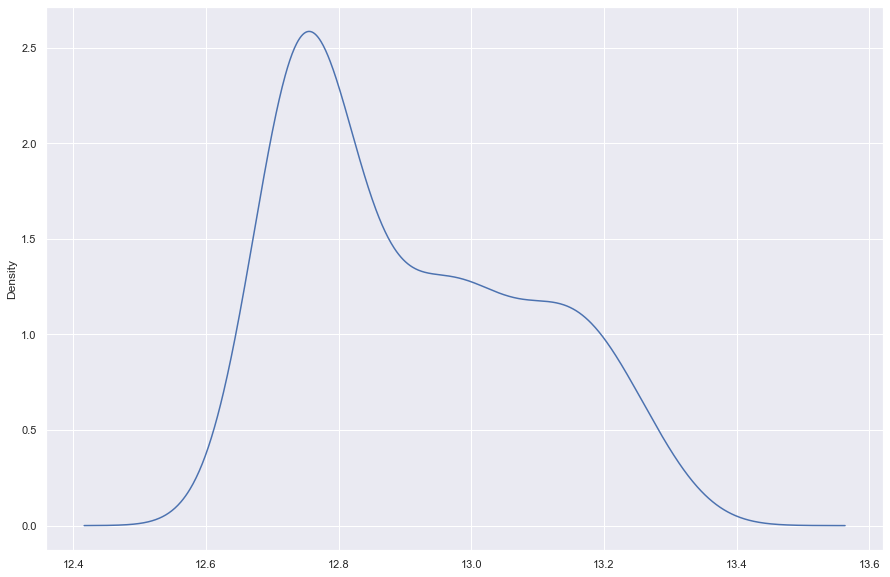

In [166]:
series_topzip_log.plot(kind='kde', figsize = (15,10));

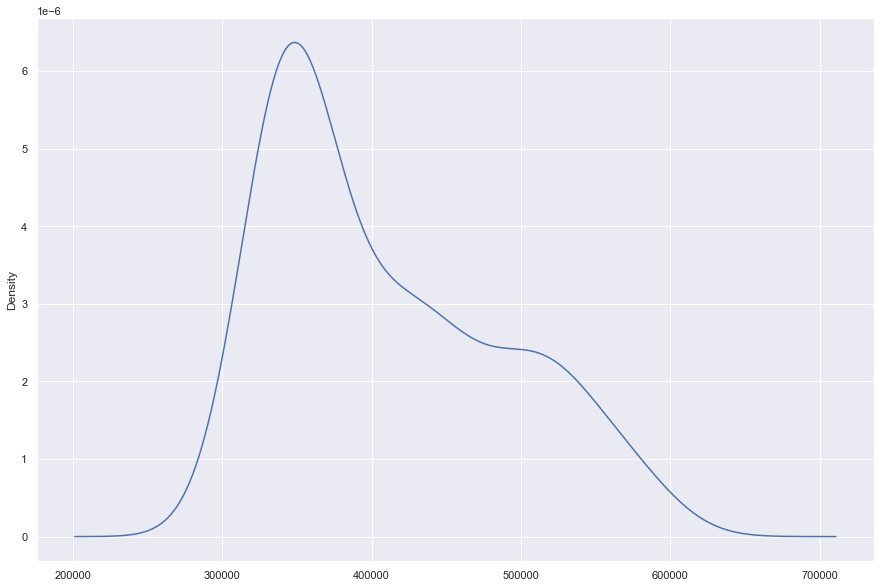

In [167]:
series_28204_2010.plot(kind='kde', figsize = (15,10));

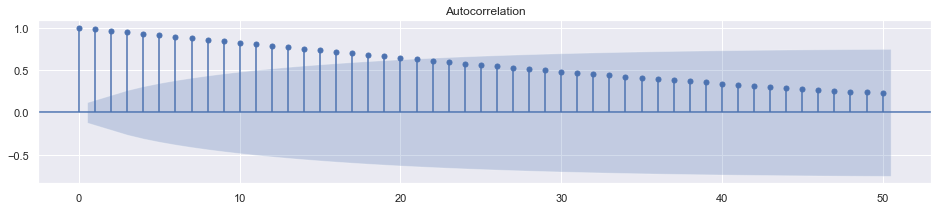

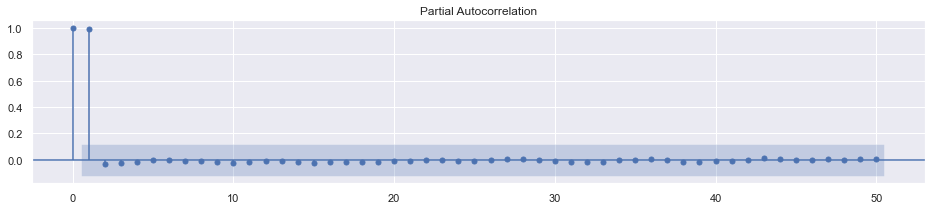

In [177]:
# Plotting ACF + PACF 
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(16,3))
plot_acf(top_zip_series, ax=ax, lags=50);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(top_zip_series, ax=ax, lags=50);

Next Up: Modeling
--


In [179]:
series_28204_2010.to_csv(r'C:\Users\samsung\data-science-journey\Course Materials\bddl\time_series_home_prices\series_28204_2010.csv', index = False)

In [180]:
top_zip_series.to_csv(r'C:\Users\samsung\data-science-journey\Course Materials\bddl\time_series_home_prices\top_zip_series.csv', index = False)